In [1]:
import pandas as pd
import numpy as np

In [2]:
# 데이터셋 불러오기

# subway데이터셋: 서울시 30분 단위 이용 통계(20~22년)
subway20 = pd.read_csv("data/subway20_df.csv")
subway21 = pd.read_csv("data/subway21_df.csv")
subway22 = pd.read_csv("data/subway22_df.csv")

# EXC데이터셋: 우수중소기업 공간데이터
EXC =  pd.read_csv("data/EXC_df.csv")

# TBVIATR데이터셋: 서울시 주요시설, 집객시설 주요데이터(20년)
TBVIATR = pd.read_csv("data/TBVIATR_df.csv")

# Seoul데이터셋: 서울시 지하철 시간대별 승객수(16~19년)
SEOUL17 = pd.read_csv("data/SEOUL17_df.csv")
SEOUL18 = pd.read_csv("data/SEOUL18_df.csv")
SEOUL19 = pd.read_csv("data/SEOUL19_df.csv")

# STATN데이터셋: 수도권 지하철 공간데이터(19년)
STATN19 = pd.read_csv("data/STATN19_df.csv")

# 1. 시각화

In [3]:
# 파이썬 시각화 패키지 불러오기
import matplotlib.pyplot as plt
%matplotlib inline


# 사용자 운영체제 확인
import platform
platform.system()

# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

## subway데이터셋: 서울시 30분 단위 이용 통계(20년)

### 호선별 승하차 총 인원 수

In [4]:
subway21['GET_TOTAL'] = subway21['GETON_CNT'] + subway21['GETOFF_CNT']

In [5]:
subway21_total = subway21[['LINE_NM','GET_TOTAL']].groupby('LINE_NM', as_index = False).sum().sort_values('GET_TOTAL')
subway21_total

,LINE_NM,GET_TOTAL
10,우이신설선,23084704
9,9호선2~3단계,43636427
0,1호선,69914047
7,8호선,86694515
8,9호선,122718068
5,6호선,154927011
3,4호선,223497636
2,3호선,234372532
4,5호선,309580895
6,7호선,318074271


Text(0.5, 1.0, '21년 호선별 승하차인원 합계')

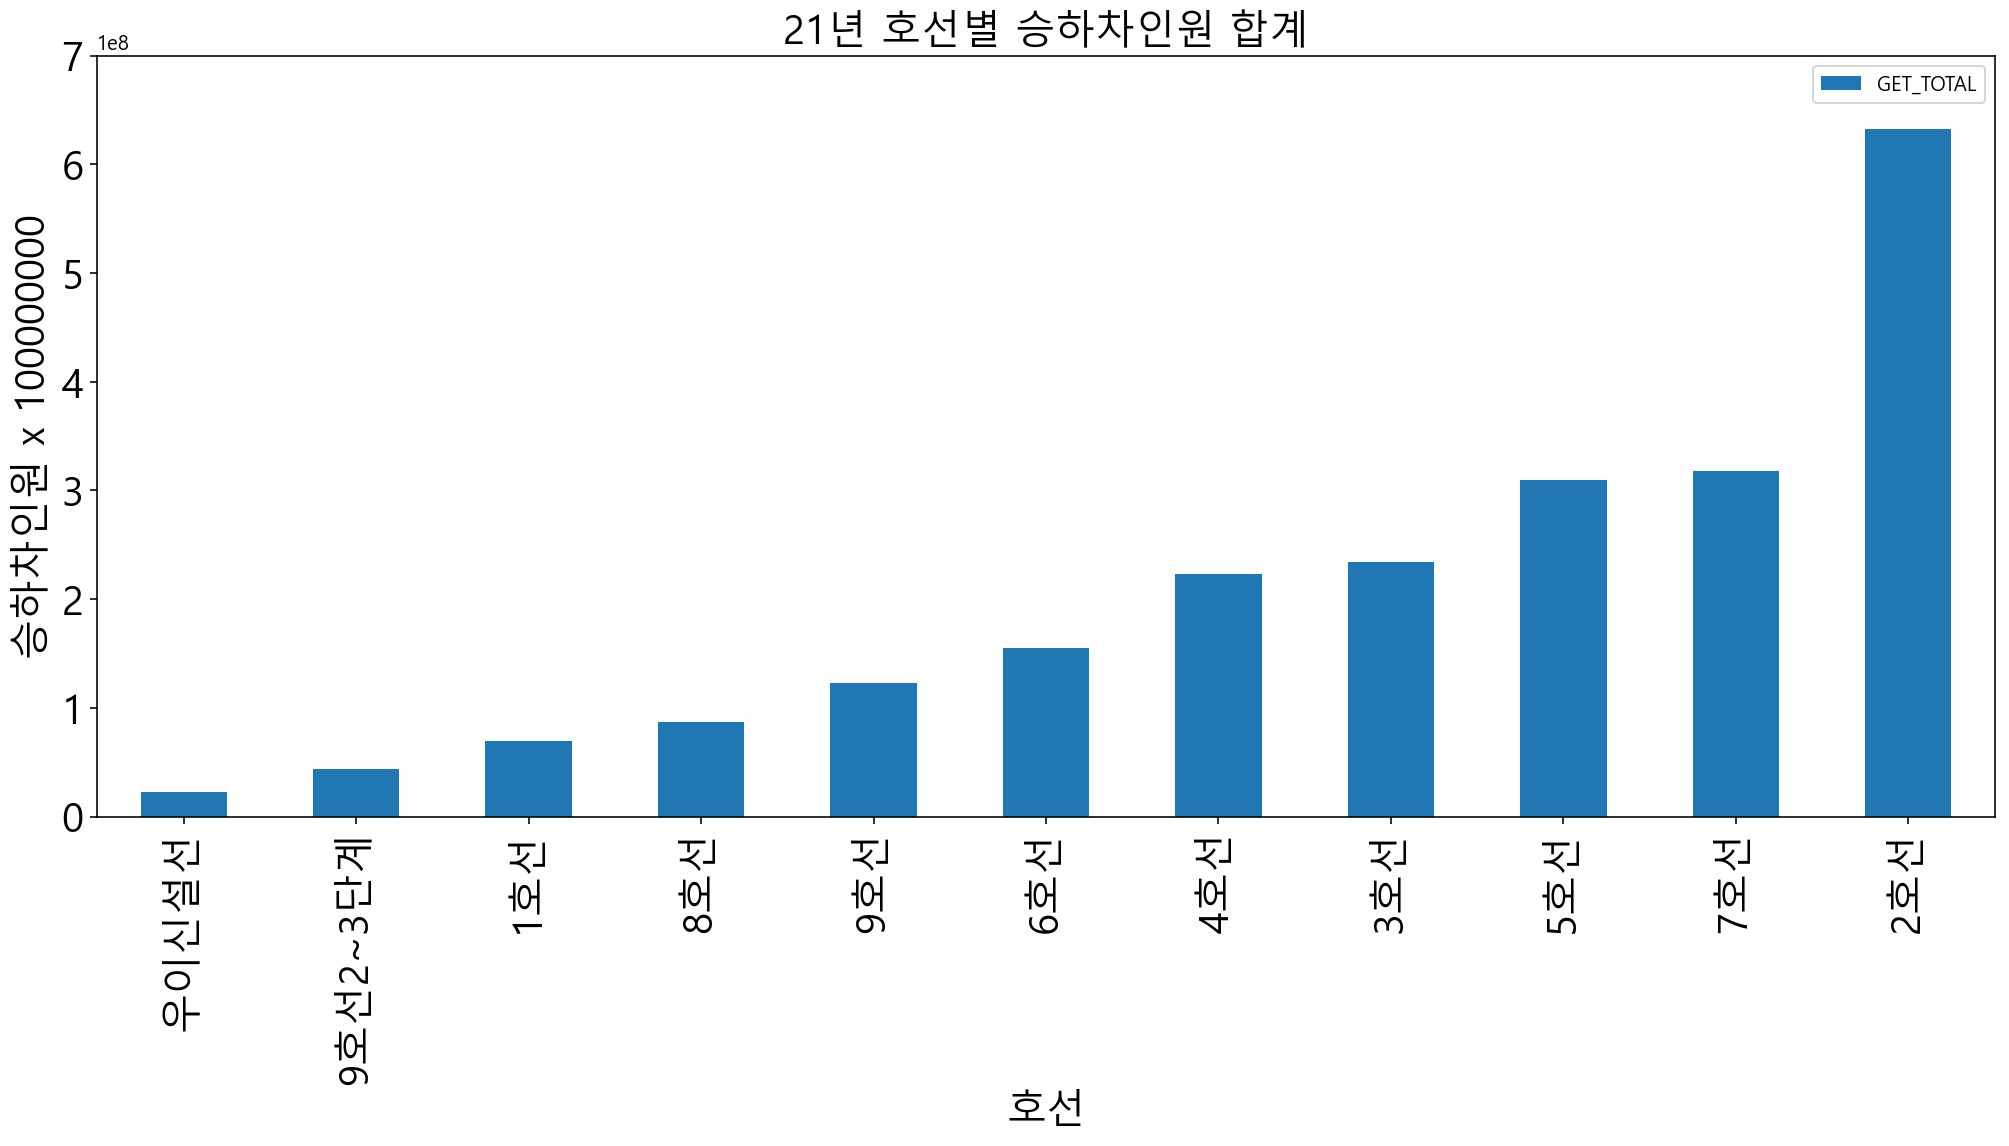

In [6]:
import matplotlib.pyplot as plt
# fig, ax = plt.subplots(figsize = (12, 12))
subway21_total.plot.bar(x = 'LINE_NM', y = 'GET_TOTAL', fontsize = 20, figsize = (17, 7))
plt.xlabel('호선', fontsize = 20)
plt.ylabel('승하차인원 x 100000000', fontsize = 20)
plt.ylim([0, 700000000])
plt.title("21년 호선별 승하차인원 합계", fontsize = 20)

## 역별 승하차인원 시각화

In [7]:
# 역별 승하차 인원 확인
subway21['GET_TOTAL'] = subway21['GETON_CNT'] + subway21['GETOFF_CNT']
subway21
subway21_sort = subway21.sort_values(ascending = False, by = 'GET_TOTAL')
subway21_sort.groupby(['STATION_NM', 'LINE_NM']).sum('GET_TOTAL')[['GET_TOTAL']].sort_values('GET_TOTAL', ascending = False).head(15)

,,GET_TOTAL
STATION_NM,LINE_NM,
강남,2호선,39321791
잠실(송파구청),2호선,34859312
신림,2호선,31166581
구로디지털단지,2호선,27919882
홍대입구,2호선,24607291
서울대입구(관악구청),2호선,23663886
삼성(무역센터),2호선,22896033
선릉,2호선,22516073
역삼,2호선,22192869


In [8]:
subway21 = subway21.pivot_table(index='STATION_NM', values=['GETON_CNT','GETOFF_CNT'], aggfunc='sum').reset_index()
subway21
subway21_sort = subway21.sort_values(by='GETOFF_CNT', ascending=False)
subway21_sort

,STATION_NM,GETOFF_CNT,GETON_CNT
234,잠실(송파구청),21310722,21089196
5,강남,19660167,19661624
20,고속터미널,18111401,18015888
177,신림,15334779,15831802
124,사당,14685789,14800449
...,...,...,...
239,장암,267825,602385
78,둔촌오륜,267690,293802
49,남태령,235189,277492
48,남위례,34830,30744


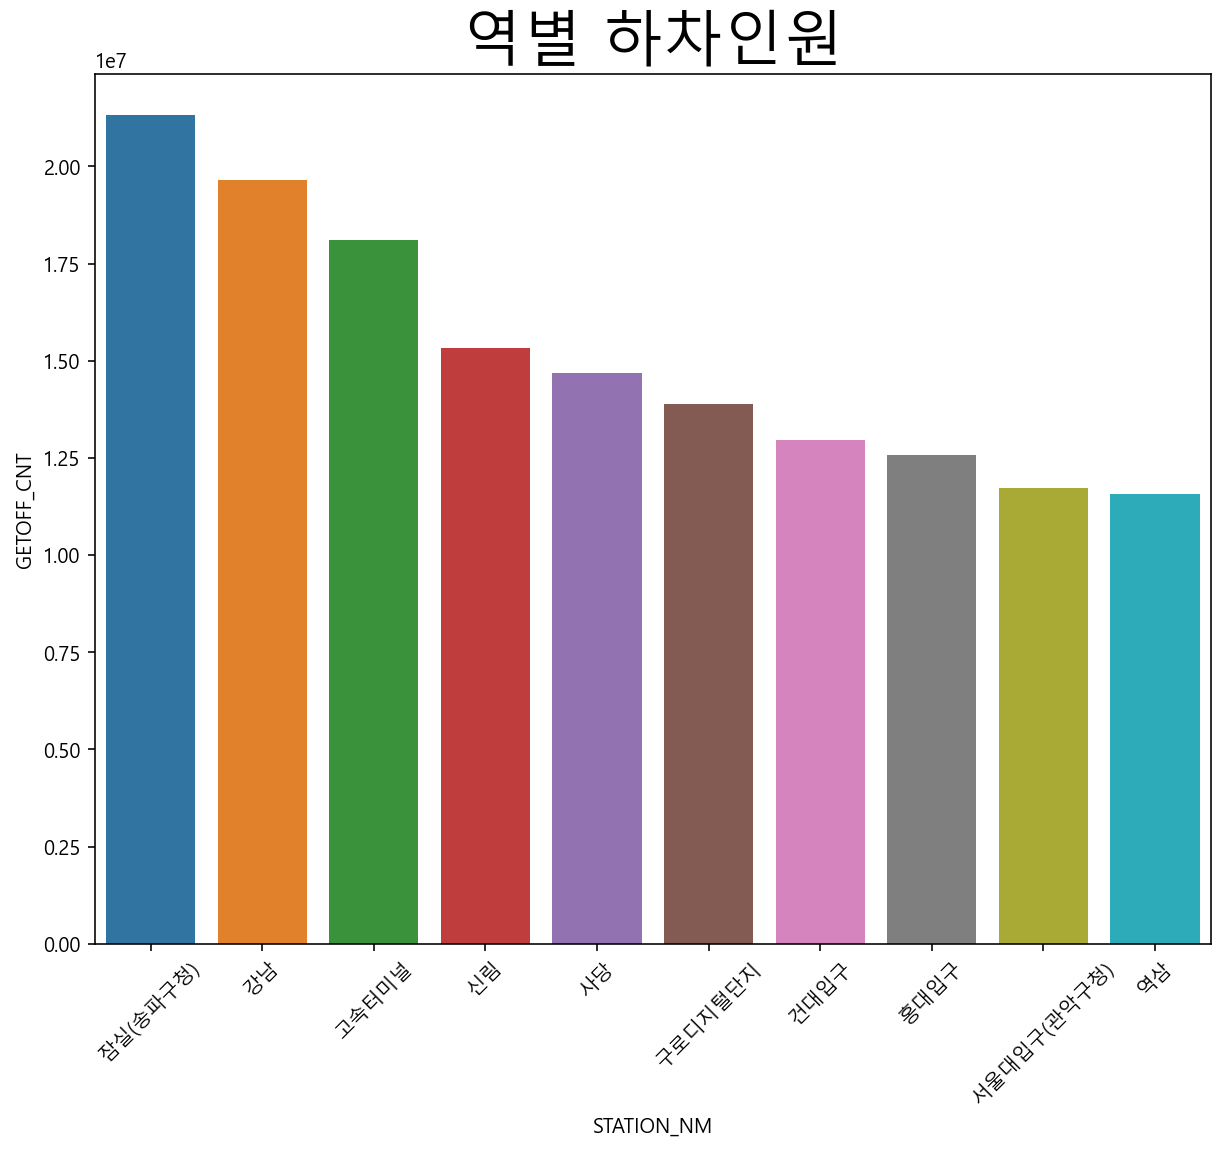

In [9]:
import seaborn as sns

sw_s = plt.figure(figsize=(10,8))
plt.xticks(rotation=45)
sw_s = plt.title('역별 하차인원', fontsize=30)
sw_s = sns.barplot(data=subway21_sort.head(10), x='STATION_NM', y='GETOFF_CNT')

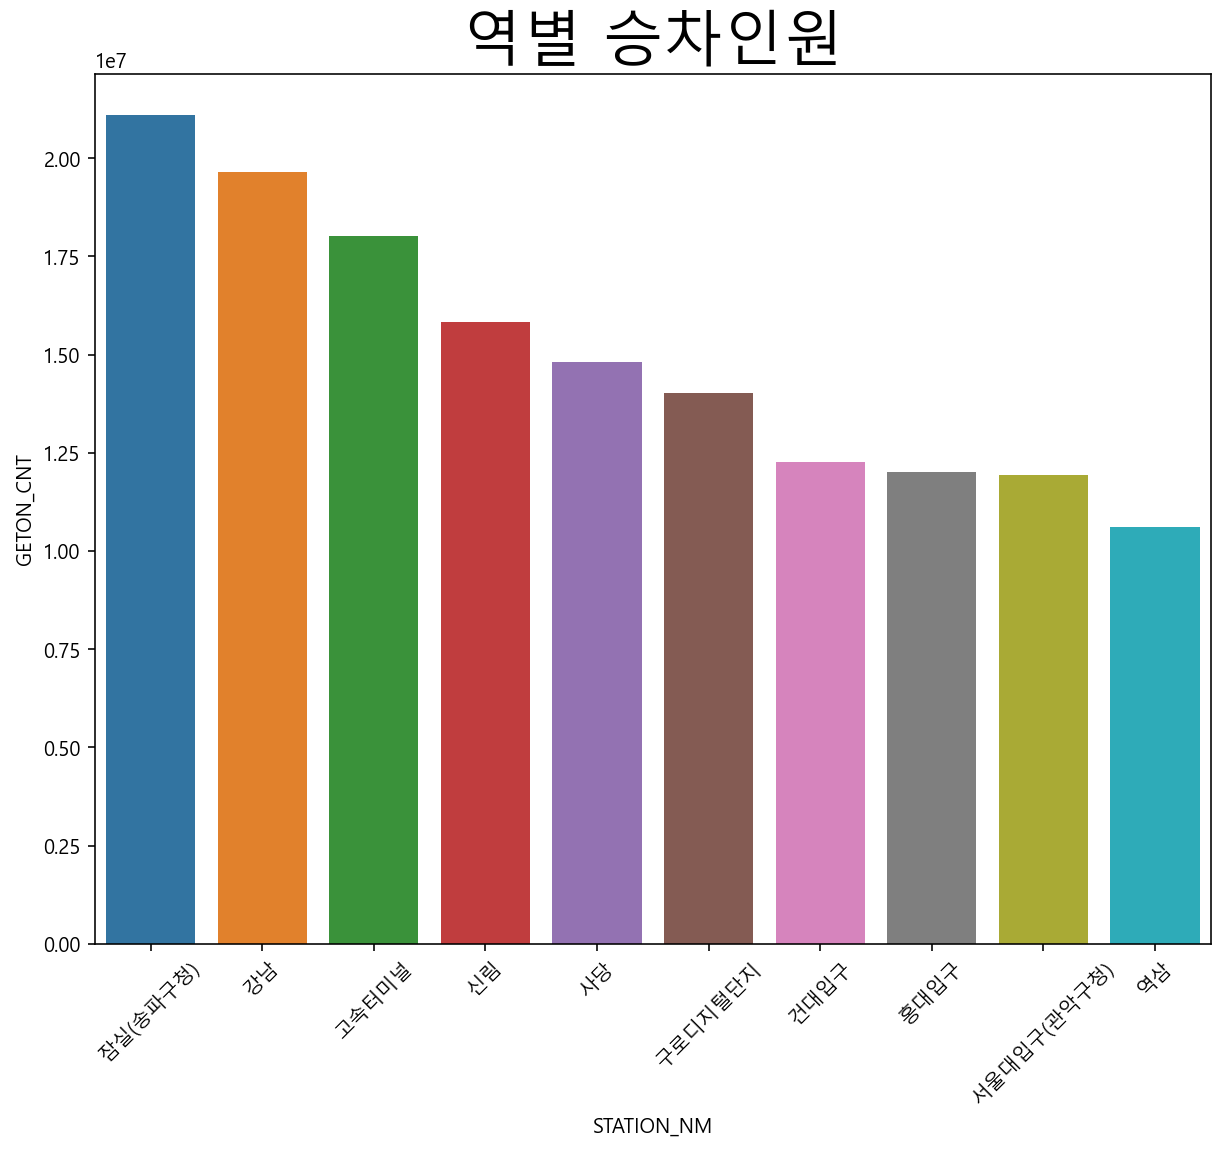

In [10]:
import seaborn as sns

sw_s = plt.figure(figsize=(10,8))
plt.xticks(rotation=45)
sw_s = plt.title('역별 승차인원', fontsize=30)
sw_s = sns.barplot(data=subway21_sort.head(10), x='STATION_NM', y='GETON_CNT')

# 강남과 잠실의 순서가 승차인원과 하차인원에서 다르다.

# STATN19: 수도권 지하철 공간데이터(19년)

* 지하철의 좌표값을 이용해 지도에 마커를 찍을 예정

In [11]:
# 필요한 컬럼만 뽑기

STATN19 = STATN19[['STN_NM','BB_RT', 'TM_X', 'TM_Y']]
STATN19

,STN_NM,BB_RT,TM_X,TM_Y
0,미아사거리,4,202653.112000,557083.212000
1,길음,4,202211.999200,555986.072800
2,성신여대입구,4,201448.475600,554789.239200
3,한성대입구,4,200549.379300,554326.801300
4,혜화,4,200162.857800,553647.385000
...,...,...,...,...
675,송산,의정부,207682.620246,570843.123742
676,탑석,의정부,207819.193238,570432.583073
677,성신여대입구,우이,201448.649054,554784.394200
678,보문,우이,201711.822463,553970.009115


In [12]:
# 5호선만 뽑아보리기

STATN19_5 = STATN19[STATN19["BB_RT"].str.contains('5')].reset_index(drop = True)
STATN19_5.head()

,STN_NM,BB_RT,TM_X,TM_Y
0,방화,5,183460.6294,553121.1899
1,개화산,5,182879.1880,552562.2672
2,김포공항,5,182425.2178,551457.3293
3,송정,5,183389.1858,551316.6236
4,마곡,5,184579.3985,551203.2401


In [13]:
# 7호선만 뽑기

STATN19_9 = STATN19[STATN19["BB_RT"].str.contains('9')].reset_index(drop = True)
STATN19_9.BB_RT.value_counts()

9    30
Name: BB_RT, dtype: int64

In [14]:
# 2호선만 뽑기

STATN19_2 = STATN19[STATN19["BB_RT"].str.contains('2')].reset_index(drop = True)[:51]
STATN19_2.head()

,STN_NM,BB_RT,TM_X,TM_Y
0,시청,2,197977.7552,551692.4450
1,을지로입구,2,198464.5269,551836.1661
2,을지로3가,2,199285.3567,551867.2392
3,을지로4가,2,199830.3068,551938.9009
4,동대문역사문화공원,2,200697.5168,551738.8380


In [15]:
# 인덱스 순서 같게 하여 세로로 합치기

A = STATN19_5.append(STATN19_9).reset_index(drop = True)
STATN19_592 = A.append(STATN19_2).reset_index(drop = True)

C:\Users\jemin\AppData\Local\Temp\ipykernel_13044\1094100710.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  A = STATN19_5.append(STATN19_9).reset_index(drop = True)
C:\Users\jemin\AppData\Local\Temp\ipykernel_13044\1094100710.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  STATN19_592 = A.append(STATN19_2).reset_index(drop = True)


In [16]:
# 잘 합쳐진건지 확인

STATN19_592

,STN_NM,BB_RT,TM_X,TM_Y
0,방화,5,183460.629400,553121.189900
1,개화산,5,182879.188000,552562.267200
2,김포공항,5,182425.217800,551457.329300
3,송정,5,183389.185800,551316.623600
4,마곡,5,184579.398500,551203.240100
...,...,...,...,...
127,도림천,2,189636.922600,546102.029000
128,양천구청,2,188138.364800,545894.398100
129,신정네거리,2,186998.713800,546747.951900
130,용두,2,203364.482800,552726.071500


In [17]:
# !pip install pyproj

In [18]:
# !pip install folium

In [19]:
# !pip install haversine

In [20]:
import pandas as pd
import numpy as np
import pyproj
# 지도 시각화
import folium as g
from folium.plugins import MiniMap
from folium.plugins import MarkerCluster
import warnings
warnings.filterwarnings('ignore')

In [21]:
# TM좌표계를 위도/경도 좌표로 변환하기 위해 따로 뽑기

STATN19_xy = STATN19_592[["TM_X","TM_Y"]]

In [22]:
STATN19_xy

,TM_X,TM_Y
0,183460.629400,553121.189900
1,182879.188000,552562.267200
2,182425.217800,551457.329300
3,183389.185800,551316.623600
4,184579.398500,551203.240100
...,...,...
127,189636.922600,546102.029000
128,188138.364800,545894.398100
129,186998.713800,546747.951900
130,203364.482800,552726.071500


In [23]:
# TM -> 위도/경도 변환 함수

def project_array(coord, p1_type, p2_type):
    """
    좌표계 변환 함수
    - coord: x, y 좌표 정보가 담긴 NumPy Array
    - p1_type: 입력 좌표계 정보 ex) epsg:5186
    - p2_type: 출력 좌표계 정보 ex) epsg:4326
    """
    p1 = pyproj.Proj(init=p1_type)
    p2 = pyproj.Proj(init=p2_type)
    fx, fy = pyproj.transform(p1, p2, coord[:, 0], coord[:, 1])
    return np.dstack([fx, fy])[0]

In [24]:
coord = np.array(STATN19_xy)
coord.shape

(132, 2)

In [25]:
# 좌표계 정보 설정
p1_type = "epsg:5186"
p2_type = "epsg:4326"

# project_array() 함수 실행
result_sub = project_array(coord, p1_type, p2_type)
result_sub[:5]

array([[126.81276331,  37.5774913 ],
       [126.80619409,  37.57244484],
       [126.80108169,  37.56248091],
       [126.81199539,  37.56123104],
       [126.82546879,  37.56023014]])

In [26]:
STATN19_592["위도"] = result_sub[:, 1]

In [27]:
STATN19_592["경도"] = result_sub[:, 0]

In [28]:
STATN19_592

,STN_NM,BB_RT,TM_X,TM_Y,위도,경도
0,방화,5,183460.629400,553121.189900,37.577491,126.812763
1,개화산,5,182879.188000,552562.267200,37.572445,126.806194
2,김포공항,5,182425.217800,551457.329300,37.562481,126.801082
3,송정,5,183389.185800,551316.623600,37.561231,126.811995
4,마곡,5,184579.398500,551203.240100,37.560230,126.825469
...,...,...,...,...,...,...
127,도림천,2,189636.922600,546102.029000,37.514339,126.882782
128,양천구청,2,188138.364800,545894.398100,37.512450,126.865835
129,신정네거리,2,186998.713800,546747.951900,37.520125,126.852930
130,용두,2,203364.482800,552726.071500,37.574074,127.038086


In [29]:
STATN19_592 = STATN19_592.drop(['TM_X', 'TM_Y'], axis = 1)

In [30]:
STATN19_592

,STN_NM,BB_RT,위도,경도
0,방화,5,37.577491,126.812763
1,개화산,5,37.572445,126.806194
2,김포공항,5,37.562481,126.801082
3,송정,5,37.561231,126.811995
4,마곡,5,37.560230,126.825469
...,...,...,...,...
127,도림천,2,37.514339,126.882782
128,양천구청,2,37.512450,126.865835
129,신정네거리,2,37.520125,126.852930
130,용두,2,37.574074,127.038086


In [31]:
g_map = g.Map(location =[37.613333,127.030049],zoom_start = 12)

In [32]:
# 앞서 구한 위도와 경도 정보를 가지고 실제 위치에 찍은 결과

for item in STATN19_592.index:
    lat = STATN19_592.loc[item, '위도']
    long = STATN19_592.loc[item, '경도']
    g.Marker([lat, long],
                        fill = True).add_to(g_map)
g_map

## TBVIATR데이터셋: 서울시 주요시설, 집객시설 주요데이터(20년)

In [33]:
TBVIATR.head()

,STDR_YM,VIAT_SE_CD,VIAT_CD,VIAT_ID,LCLASDC,MLSFCDC,SCLASDC,DCLASDC,BCLASDC,VIAT_NM,ADRES_CD,ADRES_NM,TELNO,X_VALUE,Y_VALUE,ADRES_SP,BLCK_CD,REGIST_DE,ERSR_DE,REGIST_DT
0,NaN,30102,200,AA0000000001,교육/보건,교육시설,초등교육기관,공립초등학교,NaN,"강덕초교,고덕그라시움버스정류장쉘터",NaN,NaN,NaN,214388.672913,551205.841919,NaN,156656.0,NaN,NaN,NaN
1,NaN,70301,302,AA0000000002,산업,서비스산업,종합상품판매업,대형상가,일반종합상가,고덕그라시움상가,NaN,NaN,NaN,214555.910095,550962.356812,NaN,156617.0,NaN,NaN,NaN
2,NaN,30102,200,AA0000000003,교육/보건,교육시설,초등교육기관,공립초등학교,NaN,서울강덕초등학교,NaN,NaN,NaN,214224.118713,550979.324829,NaN,156670.0,NaN,NaN,NaN
3,NaN,30101,100,AA0000000004,교육/보건,교육시설,유아교육기관,어린이집,NaN,은빛어린이집,NaN,NaN,NaN,214171.512024,550841.469116,NaN,155226.0,NaN,NaN,NaN
4,NaN,70301,302,AA0000000005,산업,서비스산업,종합상품판매업,대형상가,일반종합상가,고덕그라시움상가,NaN,NaN,NaN,214481.776611,550819.438110,NaN,155064.0,NaN,NaN,NaN


In [34]:
# 필요한 컬럼만 가져오기

TBVIATR = TBVIATR[["LCLASDC", "MLSFCDC", "X_VALUE", "Y_VALUE"]]
TBVIATR

,LCLASDC,MLSFCDC,X_VALUE,Y_VALUE
0,교육/보건,교육시설,214388.672913,551205.841919
1,산업,서비스산업,214555.910095,550962.356812
2,교육/보건,교육시설,214224.118713,550979.324829
3,교육/보건,교육시설,214171.512024,550841.469116
4,산업,서비스산업,214481.776611,550819.438110
...,...,...,...,...
19456,교육/보건,교육시설,191061.555317,544289.967983
19457,교육/보건,교육시설,191005.451446,542730.985067
19458,산업,서비스산업,191354.443045,541322.297120
19459,교육/보건,보건시설,188687.329239,547251.976724


In [35]:
# TM -> 위도/경도 좌표계 변환하기 위해 좌표만 끄집어냄

TBVIATR_xy = TBVIATR[["X_VALUE", "Y_VALUE"]]
TBVIATR_xy

,X_VALUE,Y_VALUE
0,214388.672913,551205.841919
1,214555.910095,550962.356812
2,214224.118713,550979.324829
3,214171.512024,550841.469116
4,214481.776611,550819.438110
...,...,...
19456,191061.555317,544289.967983
19457,191005.451446,542730.985067
19458,191354.443045,541322.297120
19459,188687.329239,547251.976724


In [36]:
# TM -> 위경도 변환 함수

def project_array(coord, p1_type, p2_type):
    """
    좌표계 변환 함수
    - coord: x, y 좌표 정보가 담긴 NumPy Array
    - p1_type: 입력 좌표계 정보 ex) epsg:5186
    - p2_type: 출력 좌표계 정보 ex) epsg:4326
    """
    p1 = pyproj.Proj(init=p1_type)
    p2 = pyproj.Proj(init=p2_type)
    fx, fy = pyproj.transform(p1, p2, coord[:, 0], coord[:, 1])
    return np.dstack([fx, fy])[0]

In [37]:
coord = np.array(TBVIATR_xy)
coord.shape
#coord[:5]

(19461, 2)

In [38]:
coord.shape

(19461, 2)

In [39]:
# 좌표계 정보 설정
p1_type = "epsg:5186"
p2_type = "epsg:4326"

# project_array() 함수 실행
result_imt = project_array(coord, p1_type, p2_type)
result_imt[:5]

array([[127.16285188,  37.56027027],
       [127.16473985,  37.55807386],
       [127.16098506,  37.55823192],
       [127.16038702,  37.55699066],
       [127.16389801,  37.55678734]])

In [40]:
TBVIATR

,LCLASDC,MLSFCDC,X_VALUE,Y_VALUE
0,교육/보건,교육시설,214388.672913,551205.841919
1,산업,서비스산업,214555.910095,550962.356812
2,교육/보건,교육시설,214224.118713,550979.324829
3,교육/보건,교육시설,214171.512024,550841.469116
4,산업,서비스산업,214481.776611,550819.438110
...,...,...,...,...
19456,교육/보건,교육시설,191061.555317,544289.967983
19457,교육/보건,교육시설,191005.451446,542730.985067
19458,산업,서비스산업,191354.443045,541322.297120
19459,교육/보건,보건시설,188687.329239,547251.976724


In [41]:
TBVIATR["위도"] = result_imt[:, 1]
TBVIATR["경도"] = result_imt[:, 0]

In [42]:
TBVIATR = TBVIATR[["LCLASDC", "MLSFCDC", "위도", "경도"]]
TBVIATR

,LCLASDC,MLSFCDC,위도,경도
0,교육/보건,교육시설,37.560270,127.162852
1,산업,서비스산업,37.558074,127.164740
2,교육/보건,교육시설,37.558232,127.160985
3,교육/보건,교육시설,37.556991,127.160387
4,산업,서비스산업,37.556787,127.163898
...,...,...,...,...
19456,교육/보건,교육시설,37.498027,126.898918
19457,교육/보건,교육시설,37.483980,126.898303
19458,산업,서비스산업,37.471291,126.902265
19459,교육/보건,보건시설,37.524689,126.872023


In [43]:
# 역 이름과 호선 name으로 넣는 과정, 
# 역 이름과 호선별로 각 시설들이 몇개 씩 있는지 확인하기 위해 name을 설정하였다.
# 이 아래는 몇개씩 있는지 확인하는 과정이다.

STATN19_592_name = STATN19_592[['STN_NM', 'BB_RT']]
name = np.array(STATN19_592_name)
name[:5]

array([['방화', '5'],
       ['개화산', '5'],
       ['김포공항', '5'],
       ['송정', '5'],
       ['마곡', '5']], dtype=object)

In [44]:
# 시설의 개수 확인하기

TBVIATR.LCLASDC.value_counts()

교육/보건       13049
산업           2660
숙박/음식        2474
행정            607
레저/관광/예술      476
공공/환경         109
시설물            86
Name: LCLASDC, dtype: int64

In [45]:
result_sub = np.array(STATN19_592[['위도', '경도']])
result_imt = np.array(TBVIATR[['위도', '경도']])

In [46]:
TBVIATR.head()

,LCLASDC,MLSFCDC,위도,경도
0,교육/보건,교육시설,37.560270,127.162852
1,산업,서비스산업,37.558074,127.164740
2,교육/보건,교육시설,37.558232,127.160985
3,교육/보건,교육시설,37.556991,127.160387
4,산업,서비스산업,37.556787,127.163898


#### 교육/보건

In [47]:
from haversine import haversine, Unit

In [48]:
TBVIATR_edu_1 = TBVIATR.set_index('LCLASDC')
TBVIATR_edu_1 = TBVIATR_edu_1.loc["교육/보건"].reset_index()
TBVIATR_edu_1["LCLASDC"].head()

0    교육/보건
1    교육/보건
2    교육/보건
3    교육/보건
4    교육/보건
Name: LCLASDC, dtype: object

In [49]:
TBVIATR_edu_1

,LCLASDC,MLSFCDC,위도,경도
0,교육/보건,교육시설,37.560270,127.162852
1,교육/보건,교육시설,37.558232,127.160985
2,교육/보건,교육시설,37.556991,127.160387
3,교육/보건,교육시설,37.498516,127.102067
4,교육/보건,교육시설,37.497201,127.102680
...,...,...,...,...
13044,교육/보건,보건시설,37.450467,126.909474
13045,교육/보건,교육시설,37.498027,126.898918
13046,교육/보건,교육시설,37.483980,126.898303
13047,교육/보건,보건시설,37.524689,126.872023


In [50]:
TBVIATR_edu_result_1 = np.array(TBVIATR_edu_1[['위도', '경도']])
TBVIATR_edu_result_1

array([[ 37.56027027, 127.16285188],
       [ 37.55823192, 127.16098506],
       [ 37.55699066, 127.16038702],
       ...,
       [ 37.48398012, 126.89830273],
       [ 37.52468894, 126.87202331],
       [ 37.52722912, 127.03309306]])

In [51]:
# 역별로 교육/보건 시설의 개수

print("교육/보건\n")
sb3 = []
i = 0
for a, b in result_sub:
    lyon = (a, b)       # 실제 지하철 역의 위도 경도값 설정
    count = 0 
    for c, d in TBVIATR_edu_result_1:
        paris=(c, d)                  # 실제 시설의 위도 경도값 설정
        A = haversine(lyon, paris) < 1     # 지하철역의 위치값을 기준으로 반경 1km내에 포함된 시설 찾기
        if A is True:
            count += 1
    print(name[i], '->', count, '개')
    print("="*30)
    i += 1
    sb3.append(count)

교육/보건

['방화' '5'] -> 59 개
['개화산' '5'] -> 68 개
['김포공항' '5'] -> 34 개
['송정' '5'] -> 75 개
['마곡' '5'] -> 38 개
['발산' '5'] -> 86 개
['우장산' '5'] -> 175 개
['화곡' '5'] -> 208 개
['까치산' '5'] -> 152 개
['신정' '5'] -> 154 개
['목동' '5'] -> 154 개
['오목교' '5'] -> 63 개
['양평' '5'] -> 60 개
['영등포구청' '5'] -> 130 개
['영등포시장' '5'] -> 118 개
['신길' '5'] -> 77 개
['여의도' '5'] -> 48 개
['여의나루' '5'] -> 35 개
['마포' '5'] -> 72 개
['공덕' '5'] -> 90 개
['애오개' '5'] -> 95 개
['충정로' '5'] -> 132 개
['서대문' '5'] -> 126 개
['종로3가' '5'] -> 119 개
['을지로4가' '5'] -> 168 개
['동대문역사문화공원' '5'] -> 156 개
['청구' '5'] -> 115 개
['신금호' '5'] -> 104 개
['행당' '5'] -> 102 개
['마장' '5'] -> 114 개
['답십리' '5'] -> 81 개
['장한평' '5'] -> 53 개
['군자' '5'] -> 119 개
['아차산' '5'] -> 85 개
['광나루' '5'] -> 32 개
['천호' '5'] -> 114 개
['강동' '5'] -> 153 개
['길동' '5'] -> 132 개
['굽은다리' '5'] -> 117 개
['명일' '5'] -> 107 개
['고덕' '5'] -> 66 개
['상일동' '5'] -> 47 개
['둔촌동' '5'] -> 140 개
['올림픽공원' '5'] -> 56 개
['방이' '5'] -> 84 개
['오금' '5'] -> 104 개
['개롱' '5'] -> 109 개
['거여' '5'] -> 109 개
['마천' '5'] ->

In [52]:
# 교육/보건시설의 역에서 평균 거리

print("교육/보건\n")

dist_mean_1 = []

i = 0

for a, b in result_sub:
    lyon = (a, b)       # 실제 지하철 역의 위도 경도값 설정
    count = 0
    s = 0
    for c, d in TBVIATR_edu_result_1:
        paris=(c, d)                  # 실제 시설의 위도 경도값 설정
        A = haversine(lyon, paris) < 1     # 지하철역의 위치값을 기준으로 반경 1km내에 포함된 시설 찾기
        if A is True:
            count += 1
            s += haversine(lyon, paris)
    if count == 0:
        dist_mean_1.append(count)
        # print(name[i], '->', count, '개')
        # print("="*30)
    else:
        dist_mean_1.append(round(s/count,2))
        # print(round(s/count,2))
        # print(name[i], '->', count, '개')
        # print("="*30)
    i += 1
dist_mean_1

교육/보건



[0.55,
 0.63,
 0.81,
 0.5,
 0.74,
 0.59,
 0.65,
 0.57,
 0.63,
 0.64,
 0.65,
 0.51,
 0.74,
 0.68,
 0.53,
 0.71,
 0.61,
 0.7,
 0.66,
 0.67,
 0.64,
 0.68,
 0.55,
 0.7,
 0.71,
 0.73,
 0.64,
 0.71,
 0.7,
 0.75,
 0.66,
 0.67,
 0.67,
 0.57,
 0.56,
 0.65,
 0.68,
 0.59,
 0.65,
 0.63,
 0.65,
 0.65,
 0.69,
 0.68,
 0.72,
 0.71,
 0.65,
 0.61,
 0.57,
 0.69,
 0.65,
 0.91,
 0.81,
 0.55,
 0.68,
 0.81,
 0.58,
 0.57,
 0.7,
 0.59,
 0.58,
 0.76,
 0.52,
 0.62,
 0.72,
 0.61,
 0.72,
 0.61,
 0.74,
 0.52,
 0.92,
 0.79,
 0.58,
 0.74,
 0.78,
 0.63,
 0.67,
 0.67,
 0.64,
 0.64,
 0.72,
 0.66,
 0.66,
 0.69,
 0.71,
 0.73,
 0.61,
 0.57,
 0.65,
 0.54,
 0.67,
 0.65,
 0.64,
 0.65,
 0.74,
 0.57,
 0.8,
 0.58,
 0.72,
 0.66,
 0.74,
 0.63,
 0.68,
 0.51,
 0.69,
 0.61,
 0.62,
 0.6,
 0.61,
 0.55,
 0.57,
 0.6,
 0.71,
 0.66,
 0.74,
 0.68,
 0.68,
 0.62,
 0.64,
 0.62,
 0.68,
 0.71,
 0.67,
 0.68,
 0.64,
 0.72,
 0.62,
 0.71,
 0.71,
 0.61,
 0.71,
 0.63]

### 산업

In [53]:
TBVIATR_edu_2 = TBVIATR.set_index('LCLASDC')
TBVIATR_edu_2 = TBVIATR_edu_2.loc["산업"].reset_index()
TBVIATR_edu_2["LCLASDC"].head()

0    산업
1    산업
2    산업
3    산업
4    산업
Name: LCLASDC, dtype: object

In [54]:
TBVIATR_edu_result_2 = np.array(TBVIATR_edu_2[['위도', '경도']])
TBVIATR_edu_result_2

array([[ 37.55807386, 127.16473985],
       [ 37.55678734, 127.16389801],
       [ 37.56001763, 127.16372403],
       ...,
       [ 37.47204399, 126.89404121],
       [ 37.47217972, 126.89453114],
       [ 37.47129106, 126.90226514]])

In [55]:
# 역별로 산업 시설의 개수

print("산업\n")
sb4 = []
i=0
for a, b in result_sub:
    lyon = (a, b)
    count = 0 
    for c, d in TBVIATR_edu_result_2:
        paris=(c, d)
        A = haversine(lyon, paris) < 1
        if A is True:
            count += 1
    print(name[i], '->', count, '개')
    print("="*30)
    i += 1
    sb4.append(count)

산업

['방화' '5'] -> 7 개
['개화산' '5'] -> 9 개
['김포공항' '5'] -> 9 개
['송정' '5'] -> 15 개
['마곡' '5'] -> 12 개
['발산' '5'] -> 20 개
['우장산' '5'] -> 17 개
['화곡' '5'] -> 15 개
['까치산' '5'] -> 12 개
['신정' '5'] -> 19 개
['목동' '5'] -> 25 개
['오목교' '5'] -> 23 개
['양평' '5'] -> 21 개
['영등포구청' '5'] -> 27 개
['영등포시장' '5'] -> 43 개
['신길' '5'] -> 34 개
['여의도' '5'] -> 56 개
['여의나루' '5'] -> 31 개
['마포' '5'] -> 32 개
['공덕' '5'] -> 33 개
['애오개' '5'] -> 21 개
['충정로' '5'] -> 24 개
['서대문' '5'] -> 32 개
['종로3가' '5'] -> 86 개
['을지로4가' '5'] -> 101 개
['동대문역사문화공원' '5'] -> 63 개
['청구' '5'] -> 35 개
['신금호' '5'] -> 21 개
['행당' '5'] -> 14 개
['마장' '5'] -> 27 개
['답십리' '5'] -> 16 개
['장한평' '5'] -> 16 개
['군자' '5'] -> 17 개
['아차산' '5'] -> 16 개
['광나루' '5'] -> 4 개
['천호' '5'] -> 24 개
['강동' '5'] -> 30 개
['길동' '5'] -> 20 개
['굽은다리' '5'] -> 24 개
['명일' '5'] -> 22 개
['고덕' '5'] -> 17 개
['상일동' '5'] -> 13 개
['둔촌동' '5'] -> 22 개
['올림픽공원' '5'] -> 9 개
['방이' '5'] -> 20 개
['오금' '5'] -> 19 개
['개롱' '5'] -> 12 개
['거여' '5'] -> 16 개
['마천' '5'] -> 15 개
['광화문' '5'] -> 51 개
['왕십리' 

In [56]:
# 산업시설의 역에서 평균 거리

print("산업\n")

dist_mean_2 = []

i = 0

for a, b in result_sub:
    lyon = (a, b)       # 실제 지하철 역의 위도 경도값 설정
    count = 0
    s = 0
    for c, d in TBVIATR_edu_result_2:
        paris=(c, d)                  # 실제 시설의 위도 경도값 설정
        A = haversine(lyon, paris) < 1     # 지하철역의 위치값을 기준으로 반경 1km내에 포함된 시설 찾기
        if A is True:
            count += 1
            s += haversine(lyon, paris)
    if count == 0:
        dist_mean_2.append(count)
        # print(name[i], '->', count, '개')
        # print("="*30)
    else:
        dist_mean_2.append(round(s/count,2))
        # print(round(s/count,2))
        # print(name[i], '->', count, '개')
        # print("="*30)
    i += 1
dist_mean_2

산업



[0.56,
 0.55,
 0.86,
 0.6,
 0.79,
 0.5,
 0.71,
 0.61,
 0.66,
 0.63,
 0.7,
 0.52,
 0.76,
 0.59,
 0.57,
 0.8,
 0.68,
 0.73,
 0.52,
 0.6,
 0.72,
 0.72,
 0.64,
 0.46,
 0.64,
 0.67,
 0.69,
 0.67,
 0.71,
 0.69,
 0.56,
 0.58,
 0.57,
 0.66,
 0.61,
 0.54,
 0.69,
 0.67,
 0.57,
 0.58,
 0.66,
 0.62,
 0.58,
 0.75,
 0.6,
 0.65,
 0.7,
 0.63,
 0.56,
 0.67,
 0.66,
 0.73,
 0.86,
 0.45,
 0.74,
 0.89,
 0.65,
 0.56,
 0.61,
 0.51,
 0.6,
 0.84,
 0.45,
 0.57,
 0.57,
 0.68,
 0.66,
 0.59,
 0.48,
 0.43,
 0.74,
 0.57,
 0.66,
 0.56,
 0.8,
 0.75,
 0.72,
 0.69,
 0.73,
 0.59,
 0.83,
 0.6,
 0.63,
 0.65,
 0.64,
 0.67,
 0.58,
 0.78,
 0.66,
 0.63,
 0.56,
 0.61,
 0.6,
 0.65,
 0.6,
 0.5,
 0.61,
 0.64,
 0.83,
 0.6,
 0.68,
 0.59,
 0.65,
 0.64,
 0.62,
 0.61,
 0.5,
 0.52,
 0.65,
 0.54,
 0.58,
 0.61,
 0.73,
 0.65,
 0.64,
 0.7,
 0.59,
 0.57,
 0.6,
 0.7,
 0.5,
 0.67,
 0.65,
 0.72,
 0.78,
 0.62,
 0.58,
 0.74,
 0.66,
 0.48,
 0.63,
 0.66]

### 숙박/음식

In [57]:
TBVIATR_edu_3 = TBVIATR.set_index('LCLASDC')
TBVIATR_edu_3 = TBVIATR_edu_3.loc["숙박/음식"].reset_index()
TBVIATR_edu_3["LCLASDC"].head()

0    숙박/음식
1    숙박/음식
2    숙박/음식
3    숙박/음식
4    숙박/음식
Name: LCLASDC, dtype: object

In [58]:
TBVIATR_edu_result_3 = np.array(TBVIATR_edu_3[['위도', '경도']])
TBVIATR_edu_result_3

array([[ 37.53804211, 127.12821378],
       [ 37.53833182, 127.12895978],
       [ 37.53820195, 127.12814859],
       ...,
       [ 37.50817955, 126.96237648],
       [ 37.50772692, 126.96191758],
       [ 37.47826728, 126.89486763]])

In [59]:
# 역별로 숙박/음식 시설의 개수

print("숙박/음식\n")
sb5 = []
i=0
for a, b in result_sub:
    lyon = (a, b)
    count = 0 
    for c, d in TBVIATR_edu_result_3:
        paris=(c, d)
        A = haversine(lyon, paris) < 1
        if A is True:
            count += 1
    print(name[i], '->', count, '개')
    print("="*30)
    i += 1
    sb5.append(count)

숙박/음식

['방화' '5'] -> 3 개
['개화산' '5'] -> 3 개
['김포공항' '5'] -> 7 개
['송정' '5'] -> 8 개
['마곡' '5'] -> 2 개
['발산' '5'] -> 3 개
['우장산' '5'] -> 23 개
['화곡' '5'] -> 32 개
['까치산' '5'] -> 49 개
['신정' '5'] -> 19 개
['목동' '5'] -> 8 개
['오목교' '5'] -> 1 개
['양평' '5'] -> 14 개
['영등포구청' '5'] -> 39 개
['영등포시장' '5'] -> 94 개
['신길' '5'] -> 83 개
['여의도' '5'] -> 13 개
['여의나루' '5'] -> 3 개
['마포' '5'] -> 6 개
['공덕' '5'] -> 9 개
['애오개' '5'] -> 17 개
['충정로' '5'] -> 28 개
['서대문' '5'] -> 22 개
['종로3가' '5'] -> 101 개
['을지로4가' '5'] -> 122 개
['동대문역사문화공원' '5'] -> 102 개
['청구' '5'] -> 62 개
['신금호' '5'] -> 14 개
['행당' '5'] -> 35 개
['마장' '5'] -> 41 개
['답십리' '5'] -> 20 개
['장한평' '5'] -> 24 개
['군자' '5'] -> 18 개
['아차산' '5'] -> 11 개
['광나루' '5'] -> 4 개
['천호' '5'] -> 53 개
['강동' '5'] -> 82 개
['길동' '5'] -> 41 개
['굽은다리' '5'] -> 18 개
['명일' '5'] -> 4 개
['고덕' '5'] -> 2 개
['상일동' '5'] -> 0 개
['둔촌동' '5'] -> 20 개
['올림픽공원' '5'] -> 0 개
['방이' '5'] -> 0 개
['오금' '5'] -> 0 개
['개롱' '5'] -> 2 개
['거여' '5'] -> 6 개
['마천' '5'] -> 6 개
['광화문' '5'] -> 34 개
['왕십리' '5'] -> 40 

In [60]:
# 숙박/음식시설의 역에서 평균 거리

print("숙박/음식\n")

dist_mean_3 = []

i = 0

for a, b in result_sub:
    lyon = (a, b)       # 실제 지하철 역의 위도 경도값 설정
    count = 0
    s = 0
    for c, d in TBVIATR_edu_result_3:
        paris=(c, d)                  # 실제 시설의 위도 경도값 설정
        A = haversine(lyon, paris) < 1     # 지하철역의 위치값을 기준으로 반경 1km내에 포함된 시설 찾기
        if A is True:
            count += 1
            s += haversine(lyon, paris)
    if count == 0:
        dist_mean_3.append(count)
        # print(name[i], '->', count, '개')
        # print("="*30)
    else:
        dist_mean_3.append(round(s/count,2))
        # print(round(s/count,2))
        # print(name[i], '->', count, '개')
        # print("="*30)
    i += 1
dist_mean_3

숙박/음식



[0.51,
 0.46,
 0.72,
 0.28,
 0.93,
 0.27,
 0.91,
 0.73,
 0.57,
 0.78,
 0.74,
 0.18,
 0.59,
 0.59,
 0.54,
 0.72,
 0.84,
 0.71,
 0.46,
 0.47,
 0.67,
 0.69,
 0.71,
 0.51,
 0.74,
 0.63,
 0.73,
 0.73,
 0.81,
 0.74,
 0.57,
 0.59,
 0.56,
 0.53,
 0.51,
 0.45,
 0.62,
 0.39,
 0.89,
 0.59,
 0.62,
 0,
 0.79,
 0,
 0,
 0,
 0.96,
 0.77,
 0.35,
 0.75,
 0.39,
 0,
 0.72,
 0.33,
 0.9,
 0.25,
 0.9,
 0.89,
 0.66,
 0.74,
 0.33,
 0.73,
 0.49,
 0.49,
 0.64,
 0.84,
 0.81,
 0.5,
 0.76,
 0.36,
 0,
 0.75,
 0.59,
 0.52,
 0.73,
 0.58,
 0.72,
 0.78,
 0.75,
 0.75,
 0.76,
 0.71,
 0.75,
 0.66,
 0.74,
 0.63,
 0.62,
 0.62,
 0.39,
 0.75,
 0.47,
 0.74,
 0.73,
 0.66,
 0.67,
 0.8,
 0.74,
 0.42,
 0.76,
 0.76,
 0.63,
 0.55,
 0.66,
 0.68,
 0.7,
 0.52,
 0.34,
 0.97,
 0.29,
 0.86,
 0.23,
 0.68,
 0.63,
 0.84,
 0.73,
 0.66,
 0.59,
 0.49,
 0.59,
 0.64,
 0.38,
 0.73,
 0.45,
 0.69,
 0.77,
 0.73,
 0.53,
 0.74,
 0,
 0.47,
 0.7,
 0.57]

### 행정

In [61]:
TBVIATR_edu_4 = TBVIATR.set_index('LCLASDC')
TBVIATR_edu_4 = TBVIATR_edu_4.loc["행정"].reset_index()
TBVIATR_edu_4["LCLASDC"].head()

0    행정
1    행정
2    행정
3    행정
4    행정
Name: LCLASDC, dtype: object

In [62]:
TBVIATR_edu_result_4 = np.array(TBVIATR_edu_4[['위도', '경도']])
TBVIATR_edu_result_4

array([[ 37.49654608, 127.10993326],
       [ 37.59293371, 127.06575311],
       [ 37.58353155, 126.89368024],
       ...,
       [ 37.58693399, 126.98607813],
       [ 37.64067367, 127.01406449],
       [ 37.60264741, 126.92985768]])

In [63]:
# 역별로 행정 시설의 개수

print("행정\n")
sb6 = []
i=0
for a, b in result_sub:
    lyon = (a, b)
    count = 0 
    for c, d in TBVIATR_edu_result_4:
        paris=(c, d)
        A = haversine(lyon, paris) < 1
        if A is True:
            count += 1
    print(name[i], '->', count, '개')
    print("="*30)
    i += 1
    sb6.append(count)

행정

['방화' '5'] -> 2 개
['개화산' '5'] -> 3 개
['김포공항' '5'] -> 2 개
['송정' '5'] -> 2 개
['마곡' '5'] -> 0 개
['발산' '5'] -> 2 개
['우장산' '5'] -> 3 개
['화곡' '5'] -> 4 개
['까치산' '5'] -> 6 개
['신정' '5'] -> 3 개
['목동' '5'] -> 8 개
['오목교' '5'] -> 2 개
['양평' '5'] -> 6 개
['영등포구청' '5'] -> 10 개
['영등포시장' '5'] -> 7 개
['신길' '5'] -> 5 개
['여의도' '5'] -> 1 개
['여의나루' '5'] -> 0 개
['마포' '5'] -> 7 개
['공덕' '5'] -> 9 개
['애오개' '5'] -> 4 개
['충정로' '5'] -> 4 개
['서대문' '5'] -> 11 개
['종로3가' '5'] -> 4 개
['을지로4가' '5'] -> 7 개
['동대문역사문화공원' '5'] -> 7 개
['청구' '5'] -> 10 개
['신금호' '5'] -> 8 개
['행당' '5'] -> 9 개
['마장' '5'] -> 6 개
['답십리' '5'] -> 3 개
['장한평' '5'] -> 4 개
['군자' '5'] -> 8 개
['아차산' '5'] -> 5 개
['광나루' '5'] -> 1 개
['천호' '5'] -> 10 개
['강동' '5'] -> 10 개
['길동' '5'] -> 5 개
['굽은다리' '5'] -> 4 개
['명일' '5'] -> 6 개
['고덕' '5'] -> 3 개
['상일동' '5'] -> 2 개
['둔촌동' '5'] -> 7 개
['올림픽공원' '5'] -> 3 개
['방이' '5'] -> 2 개
['오금' '5'] -> 3 개
['개롱' '5'] -> 3 개
['거여' '5'] -> 4 개
['마천' '5'] -> 4 개
['광화문' '5'] -> 15 개
['왕십리' '5'] -> 8 개
['개화' '9'] -> 0 개
['김포공항' '9

In [64]:
# 행정시설의 역에서 평균 거리

print("행정\n")

dist_mean_4 = []

i = 0

for a, b in result_sub:
    lyon = (a, b)       # 실제 지하철 역의 위도 경도값 설정
    count = 0
    s = 0
    for c, d in TBVIATR_edu_result_4:
        paris=(c, d)                  # 실제 시설의 위도 경도값 설정
        A = haversine(lyon, paris) < 1     # 지하철역의 위치값을 기준으로 반경 1km내에 포함된 시설 찾기
        if A is True:
            count += 1
            s += haversine(lyon, paris)
    if count == 0:
        dist_mean_4.append(count)
        # print(name[i], '->', count, '개')
        # print("="*30)
    else:
        dist_mean_4.append(round(s/count,2))
        # print(round(s/count,2))
        # print(name[i], '->', count, '개')
        # print("="*30)
    i += 1
dist_mean_4

행정



[0.52,
 0.86,
 0.79,
 0.55,
 0,
 0.82,
 0.59,
 0.58,
 0.62,
 0.52,
 0.88,
 0.73,
 0.75,
 0.52,
 0.79,
 0.76,
 0.77,
 0,
 0.67,
 0.64,
 0.66,
 0.59,
 0.81,
 0.59,
 0.7,
 0.61,
 0.66,
 0.61,
 0.65,
 0.81,
 0.67,
 0.79,
 0.52,
 0.64,
 0.18,
 0.75,
 0.84,
 0.67,
 0.65,
 0.75,
 0.75,
 0.58,
 0.72,
 0.71,
 0.49,
 0.47,
 0.76,
 0.46,
 0.53,
 0.63,
 0.55,
 0,
 0.79,
 0.65,
 0.6,
 0,
 0.6,
 0.62,
 0.51,
 0.65,
 0.7,
 0.44,
 0.64,
 0.73,
 0.52,
 0.77,
 0.73,
 0.62,
 0.99,
 0.42,
 0.66,
 0.56,
 0.62,
 0.84,
 0.56,
 0.82,
 0.79,
 0.58,
 0.78,
 0.51,
 0.68,
 0.47,
 0.65,
 0.61,
 0.7,
 0.61,
 0.59,
 0.63,
 0.55,
 0.81,
 0.46,
 0.56,
 0.76,
 0.56,
 0.4,
 0.65,
 0.47,
 0.62,
 0.68,
 0.55,
 0.89,
 0.65,
 0.6,
 0.75,
 0.85,
 0.37,
 0.58,
 0.67,
 0.45,
 0.82,
 0.54,
 0.62,
 0.63,
 0.73,
 0.83,
 0.77,
 0.52,
 0.73,
 0.55,
 0.98,
 0.79,
 0.36,
 0.73,
 0.59,
 0.46,
 0.87,
 0.81,
 0.75,
 0.63,
 0.56,
 0.62,
 0.62]

### 레저/관광/예술

In [65]:
TBVIATR_edu_5 = TBVIATR.set_index('LCLASDC')
TBVIATR_edu_5 = TBVIATR_edu_5.loc["레저/관광/예술"].reset_index()
TBVIATR_edu_5["LCLASDC"].head()

0    레저/관광/예술
1    레저/관광/예술
2    레저/관광/예술
3    레저/관광/예술
4    레저/관광/예술
Name: LCLASDC, dtype: object

In [66]:
TBVIATR_edu_result_5 = np.array(TBVIATR_edu_5[['위도', '경도']])
TBVIATR_edu_result_5[:5]

array([[ 37.49889341, 127.10445715],
       [ 37.57419305, 126.95891943],
       [ 37.46072539, 126.90504234],
       [ 37.47694521, 126.93793596],
       [ 37.4704393 , 126.91836431]])

In [67]:
#역별로 레저/관광/예술 시설의 개수

print("레저/관광/예술\n")
sb7 = []
i=0
for a, b in result_sub:
    lyon = (a, b)
    count = 0 
    for c, d in TBVIATR_edu_result_5:
        paris=(c, d)
        A = haversine(lyon, paris) < 1
        if A is True:
            count += 1
    print(name[i], '->', count, '개')
    print("="*30)
    i += 1
    sb7.append(count)

레저/관광/예술

['방화' '5'] -> 1 개
['개화산' '5'] -> 1 개
['김포공항' '5'] -> 1 개
['송정' '5'] -> 1 개
['마곡' '5'] -> 2 개
['발산' '5'] -> 3 개
['우장산' '5'] -> 3 개
['화곡' '5'] -> 3 개
['까치산' '5'] -> 2 개
['신정' '5'] -> 3 개
['목동' '5'] -> 6 개
['오목교' '5'] -> 3 개
['양평' '5'] -> 0 개
['영등포구청' '5'] -> 6 개
['영등포시장' '5'] -> 7 개
['신길' '5'] -> 3 개
['여의도' '5'] -> 1 개
['여의나루' '5'] -> 1 개
['마포' '5'] -> 0 개
['공덕' '5'] -> 1 개
['애오개' '5'] -> 1 개
['충정로' '5'] -> 3 개
['서대문' '5'] -> 8 개
['종로3가' '5'] -> 29 개
['을지로4가' '5'] -> 7 개
['동대문역사문화공원' '5'] -> 4 개
['청구' '5'] -> 3 개
['신금호' '5'] -> 2 개
['행당' '5'] -> 1 개
['마장' '5'] -> 2 개
['답십리' '5'] -> 2 개
['장한평' '5'] -> 3 개
['군자' '5'] -> 4 개
['아차산' '5'] -> 2 개
['광나루' '5'] -> 1 개
['천호' '5'] -> 3 개
['강동' '5'] -> 3 개
['길동' '5'] -> 0 개
['굽은다리' '5'] -> 0 개
['명일' '5'] -> 0 개
['고덕' '5'] -> 1 개
['상일동' '5'] -> 2 개
['둔촌동' '5'] -> 0 개
['올림픽공원' '5'] -> 7 개
['방이' '5'] -> 8 개
['오금' '5'] -> 3 개
['개롱' '5'] -> 3 개
['거여' '5'] -> 1 개
['마천' '5'] -> 0 개
['광화문' '5'] -> 38 개
['왕십리' '5'] -> 0 개
['개화' '9'] -> 0 개
['김포공항' 

In [68]:
# 레저시설의 역에서 평균 거리

print("레저\n")

dist_mean_5 = []

i = 0

for a, b in result_sub:
    lyon = (a, b)       # 실제 지하철 역의 위도 경도값 설정
    count = 0
    s = 0
    for c, d in TBVIATR_edu_result_5:
        paris=(c, d)                  # 실제 시설의 위도 경도값 설정
        A = haversine(lyon, paris) < 1     # 지하철역의 위치값을 기준으로 반경 1km내에 포함된 시설 찾기
        if A is True:
            count += 1
            s += haversine(lyon, paris)
    if count == 0:
        dist_mean_5.append(count)
        # print(name[i], '->', count, '개')
        # print("="*30)
    else:
        dist_mean_5.append(round(s/count,2))
        # print(round(s/count,2))
        # print(name[i], '->', count, '개')
        # print("="*30)
    i += 1
dist_mean_5

레저



[0.34,
 0.6,
 0.98,
 0.04,
 0.81,
 0.56,
 0.92,
 0.62,
 0.8,
 0.61,
 0.67,
 0.56,
 0,
 0.72,
 0.43,
 0.75,
 0.74,
 0.72,
 0,
 0.83,
 0.06,
 0.95,
 0.67,
 0.68,
 0.77,
 0.82,
 0.66,
 0.85,
 0.9,
 0.73,
 0.73,
 0.62,
 0.65,
 0.72,
 0.39,
 0.35,
 0.51,
 0,
 0,
 0,
 0.51,
 0.67,
 0,
 0.63,
 0.69,
 0.47,
 0.68,
 0.29,
 0,
 0.73,
 0,
 0,
 0.98,
 0.34,
 0.85,
 0.95,
 0.57,
 0.49,
 0.89,
 0,
 0.36,
 0.42,
 0,
 0.83,
 0.78,
 0.74,
 0.66,
 0,
 0.79,
 0,
 0.26,
 0.73,
 0.61,
 0.53,
 0.65,
 0.67,
 0.67,
 0.46,
 0.61,
 0.74,
 0.87,
 0.66,
 0.84,
 0.66,
 0.77,
 0.82,
 0.2,
 0.96,
 0,
 0,
 0.37,
 0.74,
 0.6,
 0.9,
 0,
 0.65,
 0.37,
 0,
 0.87,
 0.54,
 0.88,
 0.67,
 0.66,
 0.72,
 0.46,
 0.85,
 0.45,
 0.73,
 0,
 0.68,
 0.45,
 0.73,
 0.43,
 0.81,
 0.77,
 0.8,
 0.72,
 0.83,
 0.6,
 0.49,
 0.66,
 0.57,
 0.67,
 0.95,
 0.51,
 0.75,
 0.87,
 0,
 0.51,
 0.65,
 0.62,
 0.81]

### 공공/환경

In [69]:
TBVIATR_edu_6 = TBVIATR.set_index('LCLASDC')
TBVIATR_edu_6 = TBVIATR_edu_6.loc["공공/환경"].reset_index()
TBVIATR_edu_6["LCLASDC"].head()

0    공공/환경
1    공공/환경
2    공공/환경
3    공공/환경
4    공공/환경
Name: LCLASDC, dtype: object

In [70]:
TBVIATR_edu_result_6 = np.array(TBVIATR_edu_6[['위도', '경도']])
TBVIATR_edu_result_6[:5]

array([[ 37.46767352, 126.94480922],
       [ 37.51613554, 126.91214083],
       [ 37.50077829, 126.90856148],
       [ 37.48205824, 126.92792746],
       [ 37.51859504, 126.93167693]])

In [71]:
# 역별로 공공/환경 시설의 개수

print("공공/환경\n")
sb8 = []
i=0
for a, b in result_sub:
    lyon = (a, b)
    count = 0 
    for c, d in TBVIATR_edu_result_6:
        paris=(c, d)
        A = haversine(lyon, paris) < 1
        if A is True:
            count += 1
    print(name[i], '->', count, '개')
    print("="*30)
    i += 1
    sb8.append(count)

공공/환경

['방화' '5'] -> 0 개
['개화산' '5'] -> 0 개
['김포공항' '5'] -> 0 개
['송정' '5'] -> 0 개
['마곡' '5'] -> 0 개
['발산' '5'] -> 0 개
['우장산' '5'] -> 0 개
['화곡' '5'] -> 0 개
['까치산' '5'] -> 0 개
['신정' '5'] -> 0 개
['목동' '5'] -> 0 개
['오목교' '5'] -> 0 개
['양평' '5'] -> 0 개
['영등포구청' '5'] -> 0 개
['영등포시장' '5'] -> 1 개
['신길' '5'] -> 1 개
['여의도' '5'] -> 1 개
['여의나루' '5'] -> 1 개
['마포' '5'] -> 2 개
['공덕' '5'] -> 2 개
['애오개' '5'] -> 1 개
['충정로' '5'] -> 3 개
['서대문' '5'] -> 8 개
['종로3가' '5'] -> 3 개
['을지로4가' '5'] -> 1 개
['동대문역사문화공원' '5'] -> 4 개
['청구' '5'] -> 4 개
['신금호' '5'] -> 1 개
['행당' '5'] -> 0 개
['마장' '5'] -> 0 개
['답십리' '5'] -> 1 개
['장한평' '5'] -> 1 개
['군자' '5'] -> 0 개
['아차산' '5'] -> 0 개
['광나루' '5'] -> 0 개
['천호' '5'] -> 0 개
['강동' '5'] -> 0 개
['길동' '5'] -> 0 개
['굽은다리' '5'] -> 0 개
['명일' '5'] -> 0 개
['고덕' '5'] -> 0 개
['상일동' '5'] -> 0 개
['둔촌동' '5'] -> 0 개
['올림픽공원' '5'] -> 0 개
['방이' '5'] -> 0 개
['오금' '5'] -> 0 개
['개롱' '5'] -> 0 개
['거여' '5'] -> 0 개
['마천' '5'] -> 0 개
['광화문' '5'] -> 11 개
['왕십리' '5'] -> 0 개
['개화' '9'] -> 0 개
['김포공항' '9']

In [72]:
# 공공/환경시설의 역에서 평균 거리

print("공공/환경\n")

dist_mean_6 = []

i = 0

for a, b in result_sub:
    lyon = (a, b)       # 실제 지하철 역의 위도 경도값 설정
    count = 0
    s = 0
    for c, d in TBVIATR_edu_result_6:
        paris=(c, d)                  # 실제 시설의 위도 경도값 설정
        A = haversine(lyon, paris) < 1     # 지하철역의 위치값을 기준으로 반경 1km내에 포함된 시설 찾기
        if A is True:
            count += 1
            s += haversine(lyon, paris)
    if count == 0:
        dist_mean_6.append(count)
        # print(name[i], '->', count, '개')
        # print("="*30)
    else:
        dist_mean_6.append(round(s/count,2))
        # print(round(s/count,2))
        # print(name[i], '->', count, '개')
        # print("="*30)
    i += 1
dist_mean_6

공공/환경



[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.96,
 0.46,
 0.74,
 0.96,
 0.89,
 0.39,
 0.84,
 0.7,
 0.63,
 0.89,
 0.78,
 0.6,
 0.54,
 0.72,
 0,
 0,
 0.3,
 0.91,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.59,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.74,
 0.32,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.27,
 0.63,
 0.74,
 0.86,
 0.78,
 0.6,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.94,
 0.22,
 0,
 0,
 0.92,
 0.27,
 0,
 0,
 0.69,
 0.44,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.29,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.85,
 0,
 0.89,
 0.7,
 0.59,
 0.96,
 0,
 0,
 0,
 0,
 0,
 0]

### 시설물

In [73]:
TBVIATR_edu_7 = TBVIATR.set_index('LCLASDC')
TBVIATR_edu_7 = TBVIATR_edu_7.loc["시설물"].reset_index()
TBVIATR_edu_7["LCLASDC"].head()

0    시설물
1    시설물
2    시설물
3    시설물
4    시설물
Name: LCLASDC, dtype: object

In [74]:
TBVIATR_edu_result_7 = np.array(TBVIATR_edu_7[['위도', '경도']])
TBVIATR_edu_result_7[:5]

array([[ 37.57708864, 127.04994455],
       [ 37.4852527 , 126.90160758],
       [ 37.48755509, 126.9132976 ],
       [ 37.51334765, 126.92648565],
       [ 37.50241793, 126.88151226]])

In [75]:
# 역별로 시설물 시설의 개수

print("시설물\n")
sb9 = []
i=0
for a, b in result_sub:
    lyon = (a, b)
    count = 0 
    for c, d in TBVIATR_edu_result_7:
        paris=(c, d)
        A = haversine(lyon, paris) < 1
        if A is True:
            count += 1
    print(name[i], '->', count, '개')
    print("="*30)
    i += 1
    sb9.append(count)

시설물

['방화' '5'] -> 2 개
['개화산' '5'] -> 6 개
['김포공항' '5'] -> 6 개
['송정' '5'] -> 4 개
['마곡' '5'] -> 0 개
['발산' '5'] -> 0 개
['우장산' '5'] -> 0 개
['화곡' '5'] -> 1 개
['까치산' '5'] -> 1 개
['신정' '5'] -> 0 개
['목동' '5'] -> 0 개
['오목교' '5'] -> 0 개
['양평' '5'] -> 0 개
['영등포구청' '5'] -> 0 개
['영등포시장' '5'] -> 0 개
['신길' '5'] -> 1 개
['여의도' '5'] -> 1 개
['여의나루' '5'] -> 0 개
['마포' '5'] -> 1 개
['공덕' '5'] -> 1 개
['애오개' '5'] -> 0 개
['충정로' '5'] -> 2 개
['서대문' '5'] -> 0 개
['종로3가' '5'] -> 0 개
['을지로4가' '5'] -> 0 개
['동대문역사문화공원' '5'] -> 0 개
['청구' '5'] -> 0 개
['신금호' '5'] -> 0 개
['행당' '5'] -> 1 개
['마장' '5'] -> 1 개
['답십리' '5'] -> 1 개
['장한평' '5'] -> 0 개
['군자' '5'] -> 0 개
['아차산' '5'] -> 0 개
['광나루' '5'] -> 1 개
['천호' '5'] -> 0 개
['강동' '5'] -> 0 개
['길동' '5'] -> 0 개
['굽은다리' '5'] -> 0 개
['명일' '5'] -> 0 개
['고덕' '5'] -> 0 개
['상일동' '5'] -> 0 개
['둔촌동' '5'] -> 0 개
['올림픽공원' '5'] -> 0 개
['방이' '5'] -> 0 개
['오금' '5'] -> 0 개
['개롱' '5'] -> 0 개
['거여' '5'] -> 0 개
['마천' '5'] -> 0 개
['광화문' '5'] -> 0 개
['왕십리' '5'] -> 1 개
['개화' '9'] -> 4 개
['김포공항' '9'] ->

In [76]:
# 시설물시설의 역에서 평균 거리

print("시설물\n")

dist_mean_7 = []

i = 0

for a, b in result_sub:
    lyon = (a, b)       # 실제 지하철 역의 위도 경도값 설정
    count = 0
    s = 0
    for c, d in TBVIATR_edu_result_7:
        paris=(c, d)                  # 실제 시설의 위도 경도값 설정
        A = haversine(lyon, paris) < 1     # 지하철역의 위치값을 기준으로 반경 1km내에 포함된 시설 찾기
        if A is True:
            count += 1
            s += haversine(lyon, paris)
    if count == 0:
        dist_mean_7.append(count)
        # print(name[i], '->', count, '개')
        # print("="*30)
    else:
        dist_mean_7.append(round(s/count,2))
        # print(round(s/count,2))
        # print(name[i], '->', count, '개')
        # print("="*30)
    i += 1
dist_mean_7

시설물



[0.77,
 0.36,
 0.72,
 0.7,
 0,
 0,
 0,
 0.96,
 0.26,
 0,
 0,
 0,
 0,
 0,
 0,
 0.92,
 0.95,
 0,
 0.02,
 0.71,
 0,
 0.82,
 0,
 0,
 0,
 0,
 0,
 0,
 0.73,
 0.56,
 0.61,
 0,
 0,
 0,
 0.05,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.82,
 0.59,
 0.72,
 0.78,
 0.96,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.95,
 0.47,
 0,
 0,
 0,
 0,
 0,
 0.99,
 0.18,
 0.73,
 0,
 0,
 0,
 0.83,
 0.66,
 0,
 0,
 0,
 0,
 0,
 0,
 0.85,
 0,
 0.82,
 0.61,
 0.1,
 0.91,
 0.24,
 0.78,
 0.08,
 0,
 0,
 0,
 0,
 0.19,
 0,
 0,
 0,
 1.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.01,
 0.02,
 0,
 0.51,
 0,
 0,
 0,
 0,
 0,
 0.55,
 0.43,
 0,
 0.82,
 0.93,
 0.44,
 0.71,
 0.5,
 0,
 0,
 0.91,
 0.27]

In [77]:
#===========================================

## 우수중소기업 공간데이터

In [78]:
EXC =  pd.read_csv("data/EXC_df.csv")
EXC

,SMLPZ_ID,DEC_SE,CMPNY_NM,RPRSNTV_NM,INDUTY,FOND_DATE,ADDRES,TM_X,TM_Y
0,1,하이브랜드서울기업,벨금속공업㈜,이희평,날붙이 제조업,1978-01-12,서초구 효령로68길 92 (서초동),201762.893208,542899.588742
1,2,하이브랜드서울기업,㈜일성,지영배,액체 펌프 제조업,2000-01-03,구로구 경인로63길 21-6,189818.338312,545438.678543
2,3,하이브랜드서울기업,이앤에이치㈜,박대전,건설업본사,1998-05-01,"성동구 성수이로 7길 27, 701 (서울숲 코오롱디지털타워2차)",204724.207199,549119.988156
3,4,하이브랜드서울기업,㈜지넷시스템,서형덕,기타 무선 통신장비 제조업,1998-02-10,금천구 가산 디지털 2로 98 롯데아이티 캐슬 2동 6층,189481.128053,541984.760645
4,5,하이브랜드서울기업,㈜스페이스링크,양희식,컴퓨터시스템 통합 자문 및 구축 서비스업,1997-06-05,"마포구 매봉산로 37, 9층 905호 (DMC 산학협력연구센터)",190337.914065,552950.945367
...,...,...,...,...,...,...,...,...,...
684,685,서울형강소기업,한그린테크,김대현,제조업,2010-09-07,성북구 종암로 29,203178.254223,554812.267161
685,686,서울형강소기업,현대와코텍,신용성,제조,2004-05-20,노원구 노원로 15길 10 하계테크노타운 A-301,206350.871325,560260.897705
686,687,서울형강소기업,호스트센터(주),차성진,컴퓨터시스템 통합 자문 및 구축 서비스업,2002-05-23,"서초구 법원로3길 19, 3층(서초동, 양지원빌딩)",200746.667982,543731.172025
687,688,서울형강소기업,후스타일,김진석,"도소매, 제조, 무역, 전자상거래업, 건강식품 등",2005-08-30,금천구 가산디지털2로 115,189332.794053,542110.461550


In [79]:
# 필요 컬럼 선택

EXC = EXC[['DEC_SE', 'ADDRES', 'TM_X', 'TM_Y']]
EXC.head()

,DEC_SE,ADDRES,TM_X,TM_Y
0,하이브랜드서울기업,서초구 효령로68길 92 (서초동),201762.893208,542899.588742
1,하이브랜드서울기업,구로구 경인로63길 21-6,189818.338312,545438.678543
2,하이브랜드서울기업,"성동구 성수이로 7길 27, 701 (서울숲 코오롱디지털타워2차)",204724.207199,549119.988156
3,하이브랜드서울기업,금천구 가산 디지털 2로 98 롯데아이티 캐슬 2동 6층,189481.128053,541984.760645
4,하이브랜드서울기업,"마포구 매봉산로 37, 9층 905호 (DMC 산학협력연구센터)",190337.914065,552950.945367


In [80]:
# TM -> 위경도 좌표 변환을 위해 선택

EXC_xy = EXC[['TM_X', 'TM_Y']]

In [81]:
# TM -> 위경도 변환 함수

def project_array(coord, p1_type, p2_type):
    """
    좌표계 변환 함수
    - coord: x, y 좌표 정보가 담긴 NumPy Array
    - p1_type: 입력 좌표계 정보 ex) epsg:5186
    - p2_type: 출력 좌표계 정보 ex) epsg:4326
    """
    p1 = pyproj.Proj(init=p1_type)
    p2 = pyproj.Proj(init=p2_type)
    fx, fy = pyproj.transform(p1, p2, coord[:, 0], coord[:, 1])
    return np.dstack([fx, fy])[0]

In [82]:
coord = np.array(EXC_xy)
coord.shape
#coord[:5]

(689, 2)

In [83]:
# 좌표계 정보 설정
p1_type = "epsg:5186"
p2_type = "epsg:4326"

# project_array() 함수 실행
result_imt = project_array(coord, p1_type, p2_type)
result_imt[:5]

array([[127.01993265,  37.48554134],
       [126.88484315,  37.50836426],
       [127.05345553,  37.54157698],
       [126.88107858,  37.4772405 ],
       [126.89062082,  37.57605522]])

In [84]:
EXC["위도"] = result_imt[:, 1]
EXC["경도"] = result_imt[:, 0]

In [85]:
# TM좌표계는 필요없으니 삭제

EXC =EXC.drop(['TM_X', 'TM_Y'], axis =1 )
EXC

,DEC_SE,ADDRES,위도,경도
0,하이브랜드서울기업,서초구 효령로68길 92 (서초동),37.485541,127.019933
1,하이브랜드서울기업,구로구 경인로63길 21-6,37.508364,126.884843
2,하이브랜드서울기업,"성동구 성수이로 7길 27, 701 (서울숲 코오롱디지털타워2차)",37.541577,127.053456
3,하이브랜드서울기업,금천구 가산 디지털 2로 98 롯데아이티 캐슬 2동 6층,37.477240,126.881079
4,하이브랜드서울기업,"마포구 매봉산로 37, 9층 905호 (DMC 산학협력연구센터)",37.576055,126.890621
...,...,...,...,...
684,서울형강소기업,성북구 종암로 29,37.592871,127.035987
685,서울형강소기업,노원구 노원로 15길 10 하계테크노타운 A-301,37.641946,127.071958
686,서울형강소기업,"서초구 법원로3길 19, 3층(서초동, 양지원빌딩)",37.493035,127.008443
687,서울형강소기업,금천구 가산디지털2로 115,37.478371,126.879400


In [86]:
EXC_result = np.array(EXC[['위도', '경도']])
EXC_result

array([[ 37.48554134, 127.01993265],
       [ 37.50836426, 126.88484315],
       [ 37.54157698, 127.05345553],
       ...,
       [ 37.49303535, 127.00844326],
       [ 37.47837137, 126.87939977],
       [ 37.52363997, 127.0300339 ]])

In [87]:
# 역별로 중소기업 시설의 개수

print("중소기업\n")
sb2 = []
i = 0
for a, b in result_sub:
    lyon = (a, b)    # 실제 지하철 역의 위도 경도값 설정
    count = 0 
    for c, d in EXC_result:
        paris=(c, d)    # 실제 시설의 위도 경도값 설정 
        A = haversine(lyon, paris) < 1   # haversine이용해서 지하철역의 반경 1km내에 위치하는 시설 찾기
        if A is True:
            count += 1
    print(name[i], '->', count, '개')
    print("="*30)
    i += 1
    sb2.append(count)

중소기업

['방화' '5'] -> 1 개
['개화산' '5'] -> 1 개
['김포공항' '5'] -> 0 개
['송정' '5'] -> 1 개
['마곡' '5'] -> 3 개
['발산' '5'] -> 4 개
['우장산' '5'] -> 0 개
['화곡' '5'] -> 0 개
['까치산' '5'] -> 0 개
['신정' '5'] -> 1 개
['목동' '5'] -> 2 개
['오목교' '5'] -> 1 개
['양평' '5'] -> 5 개
['영등포구청' '5'] -> 10 개
['영등포시장' '5'] -> 3 개
['신길' '5'] -> 5 개
['여의도' '5'] -> 12 개
['여의나루' '5'] -> 8 개
['마포' '5'] -> 9 개
['공덕' '5'] -> 10 개
['애오개' '5'] -> 2 개
['충정로' '5'] -> 4 개
['서대문' '5'] -> 6 개
['종로3가' '5'] -> 8 개
['을지로4가' '5'] -> 9 개
['동대문역사문화공원' '5'] -> 3 개
['청구' '5'] -> 2 개
['신금호' '5'] -> 1 개
['행당' '5'] -> 0 개
['마장' '5'] -> 0 개
['답십리' '5'] -> 1 개
['장한평' '5'] -> 4 개
['군자' '5'] -> 2 개
['아차산' '5'] -> 1 개
['광나루' '5'] -> 0 개
['천호' '5'] -> 0 개
['강동' '5'] -> 0 개
['길동' '5'] -> 1 개
['굽은다리' '5'] -> 0 개
['명일' '5'] -> 0 개
['고덕' '5'] -> 0 개
['상일동' '5'] -> 0 개
['둔촌동' '5'] -> 2 개
['올림픽공원' '5'] -> 2 개
['방이' '5'] -> 2 개
['오금' '5'] -> 5 개
['개롱' '5'] -> 7 개
['거여' '5'] -> 4 개
['마천' '5'] -> 3 개
['광화문' '5'] -> 5 개
['왕십리' '5'] -> 0 개
['개화' '9'] -> 1 개
['김포공항' '9'

In [88]:
# 중소기업시설의 역에서 평균 거리

print("중소기업\n")

dist_mean_8 = []

i = 0

for a, b in result_sub:
    lyon = (a, b)       # 실제 지하철 역의 위도 경도값 설정
    count = 0
    s = 0
    for c, d in EXC_result:
        paris=(c, d)                  # 실제 시설의 위도 경도값 설정
        A = haversine(lyon, paris) < 1     # 지하철역의 위치값을 기준으로 반경 1km내에 포함된 시설 찾기
        if A is True:
            count += 1
            s += haversine(lyon, paris)
    if count == 0:
        dist_mean_8.append(count)
        # print(name[i], '->', count, '개')
        # print("="*30)
    else:
        dist_mean_8.append(round(s/count,2))
        # print(round(s/count,2))
        # print(name[i], '->', count, '개')
        # print("="*30)
    i += 1
dist_mean_8

중소기업



[0.96,
 0.68,
 0,
 0.27,
 0.74,
 0.68,
 0,
 0,
 0,
 0.07,
 0.89,
 0.98,
 0.53,
 0.63,
 0.53,
 0.77,
 0.6,
 0.79,
 0.54,
 0.54,
 0.88,
 0.6,
 0.52,
 0.68,
 0.8,
 0.69,
 0.65,
 0.78,
 0,
 0,
 0.18,
 0.65,
 0.54,
 0.35,
 0,
 0,
 0,
 0.84,
 0,
 0,
 0,
 0,
 0.54,
 0.87,
 0.84,
 0.71,
 0.73,
 0.63,
 0.65,
 0.35,
 0,
 0.35,
 0,
 0.47,
 0.7,
 0.7,
 0.58,
 0.83,
 0.43,
 0.5,
 0.39,
 0.65,
 0.59,
 0.68,
 0.54,
 0.6,
 0.65,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.88,
 0.73,
 0.76,
 0.64,
 0.74,
 0.63,
 0.72,
 0.72,
 0.69,
 0.7,
 0.8,
 0.69,
 0.62,
 0.86,
 0,
 0.86,
 0.63,
 0.5,
 0.87,
 0.62,
 0.21,
 0.63,
 0.29,
 0.54,
 0.72,
 0.55,
 0.61,
 0.6,
 0.64,
 0.61,
 0.46,
 0.65,
 0.58,
 0,
 0,
 0,
 0,
 0,
 0.61,
 0.8,
 0.72,
 0.57,
 0.63,
 0.68,
 0.6,
 0.61,
 0.74,
 0.93,
 0,
 0.6,
 0.6,
 0.83,
 0.47,
 0.63,
 0,
 0.72,
 0.7,
 0]

In [89]:
len(dist_mean_1)

132

In [90]:
# 각 시설별 역과의 평균거리를 가지고 총 평균거리 구하기


final_dist_mean = []

for i in range(132):
    sum = 0
    sum += dist_mean_1[i] + dist_mean_2[i] + dist_mean_3[i] + dist_mean_4[i] + dist_mean_5[i] + dist_mean_6[i] + dist_mean_7[i] + dist_mean_8[i]
    final_dist_mean.append(round(sum / 8, 2))

final_dist_mean

[0.53,
 0.52,
 0.61,
 0.37,
 0.5,
 0.43,
 0.47,
 0.51,
 0.44,
 0.41,
 0.57,
 0.43,
 0.42,
 0.47,
 0.54,
 0.74,
 0.74,
 0.58,
 0.47,
 0.61,
 0.56,
 0.72,
 0.57,
 0.56,
 0.64,
 0.59,
 0.57,
 0.63,
 0.56,
 0.53,
 0.53,
 0.6,
 0.44,
 0.43,
 0.29,
 0.34,
 0.42,
 0.39,
 0.34,
 0.32,
 0.4,
 0.32,
 0.42,
 0.46,
 0.42,
 0.38,
 0.56,
 0.42,
 0.33,
 0.55,
 0.38,
 0.32,
 0.61,
 0.45,
 0.68,
 0.45,
 0.48,
 0.49,
 0.48,
 0.37,
 0.37,
 0.48,
 0.34,
 0.49,
 0.47,
 0.74,
 0.63,
 0.29,
 0.47,
 0.22,
 0.32,
 0.42,
 0.51,
 0.42,
 0.64,
 0.52,
 0.54,
 0.48,
 0.64,
 0.57,
 0.61,
 0.56,
 0.62,
 0.6,
 0.64,
 0.59,
 0.51,
 0.55,
 0.38,
 0.53,
 0.41,
 0.59,
 0.56,
 0.72,
 0.36,
 0.47,
 0.41,
 0.46,
 0.61,
 0.48,
 0.55,
 0.55,
 0.54,
 0.61,
 0.47,
 0.45,
 0.38,
 0.44,
 0.25,
 0.43,
 0.33,
 0.41,
 0.47,
 0.56,
 0.62,
 0.52,
 0.47,
 0.49,
 0.45,
 0.51,
 0.64,
 0.55,
 0.51,
 0.72,
 0.66,
 0.74,
 0.57,
 0.51,
 0.31,
 0.44,
 0.61,
 0.45]

In [91]:
# 지하철역이름 및 호선

i = 0
sb = []
for a, b in result_sub:
    sb.append(name[i])
    i+= 1
sb[:5]

[array(['방화', '5'], dtype=object),
 array(['개화산', '5'], dtype=object),
 array(['김포공항', '5'], dtype=object),
 array(['송정', '5'], dtype=object),
 array(['마곡', '5'], dtype=object)]

In [92]:
# 데이터프레임화 시키기

facilities_count = pd.DataFrame(data = list(zip(sb, sb2, sb3, sb4, sb5, sb6, sb7, sb8, sb9)), columns = ['지하철', '우수중소기업', '교육/보건', '산업', '숙박/음식', '행정', '레저/관광/예술', '공공/환경', '시설물'])

In [93]:
facilities_count.set_index('지하철')

,우수중소기업,교육/보건,산업,숙박/음식,행정,레저/관광/예술,공공/환경,시설물
지하철,,,,,,,,
"[방화, 5]",1,59,7,3,2,1,0,2
"[개화산, 5]",1,68,9,3,3,1,0,6
"[김포공항, 5]",0,34,9,7,2,1,0,6
"[송정, 5]",1,75,15,8,2,1,0,4
"[마곡, 5]",3,38,12,2,0,2,0,0
...,...,...,...,...,...,...,...,...
"[도림천, 2]",3,48,16,4,2,0,0,2
"[양천구청, 2]",0,62,8,0,7,1,0,0
"[신정네거리, 2]",3,124,14,9,3,1,0,0


In [94]:
# 각 시설의 수 합치기

sb10 = facilities_count['우수중소기업'] + facilities_count['교육/보건'] + facilities_count['산업']\
+ facilities_count['숙박/음식'] + facilities_count['행정'] + facilities_count['레저/관광/예술'] + facilities_count['공공/환경']\
+ facilities_count['시설물']
facilities_count['총 합'] = sb10

In [95]:
# 앞서 구한 총 평균거리 넣기

facilities_count['평균거리'] = final_dist_mean

In [96]:
facilities_count.tail()

,지하철,우수중소기업,교육/보건,산업,숙박/음식,행정,레저/관광/예술,공공/환경,시설물,총 합,평균거리
127,"[도림천, 2]",3,48,16,4,2,0,0,2,75,0.51
128,"[양천구청, 2]",0,62,8,0,7,1,0,0,78,0.31
129,"[신정네거리, 2]",3,124,14,9,3,1,0,0,154,0.44
130,"[용두, 2]",1,155,31,44,5,4,0,1,241,0.61
131,"[까치산, 2]",0,152,12,49,6,2,0,1,222,0.45


### facilities_count를 이용하여 지하철역 별로 시설의 총합 시각화 

In [97]:
from folium.plugins import MarkerCluster

# 위도
latitude = 37.394946
# 경도
longitude = 127.111104

m = g.Map(
    location=[latitude, longitude],
    zoom_start=15
)

coords = STATN19_592[['위도', '경도']]


marker_cluster = MarkerCluster().add_to(m)

for lat, long in zip(coords['위도'], coords['경도']):
    g.Marker([lat, long], icon = g.Icon(color="green")).add_to(marker_cluster)
m

In [98]:
sub_list = [0] * 132
a = ''
n = 0
for i, v in facilities_count.지하철:
    a = i + '-' + v
    sub_list[n] = a
    n += 1
sub_list

['방화-5',
 '개화산-5',
 '김포공항-5',
 '송정-5',
 '마곡-5',
 '발산-5',
 '우장산-5',
 '화곡-5',
 '까치산-5',
 '신정-5',
 '목동-5',
 '오목교-5',
 '양평-5',
 '영등포구청-5',
 '영등포시장-5',
 '신길-5',
 '여의도-5',
 '여의나루-5',
 '마포-5',
 '공덕-5',
 '애오개-5',
 '충정로-5',
 '서대문-5',
 '종로3가-5',
 '을지로4가-5',
 '동대문역사문화공원-5',
 '청구-5',
 '신금호-5',
 '행당-5',
 '마장-5',
 '답십리-5',
 '장한평-5',
 '군자-5',
 '아차산-5',
 '광나루-5',
 '천호-5',
 '강동-5',
 '길동-5',
 '굽은다리-5',
 '명일-5',
 '고덕-5',
 '상일동-5',
 '둔촌동-5',
 '올림픽공원-5',
 '방이-5',
 '오금-5',
 '개롱-5',
 '거여-5',
 '마천-5',
 '광화문-5',
 '왕십리-5',
 '개화-9',
 '김포공항-9',
 '공항시장-9',
 '신방화-9',
 '마곡나루-9',
 '양천향교-9',
 '가양-9',
 '증미-9',
 '등촌-9',
 '염창-9',
 '신목동-9',
 '선유도-9',
 '당산-9',
 '국회의사당-9',
 '여의도-9',
 '샛강-9',
 '노량진-9',
 '노들-9',
 '흑석-9',
 '동작-9',
 '구반포-9',
 '신반포-9',
 '고속터미널-9',
 '사평-9',
 '신논현-9',
 '언주-9',
 '선정릉-9',
 '삼성중앙-9',
 '봉은사-9',
 '종합운동장-9',
 '시청-2',
 '을지로입구-2',
 '을지로3가-2',
 '을지로4가-2',
 '동대문역사문화공원-2',
 '신당-2',
 '상왕십리-2',
 '왕십리-2',
 '한양대-2',
 '뚝섬-2',
 '성수-2',
 '건대입구-2',
 '구의-2',
 '강변-2',
 '잠실나루-2',
 '잠실-2',
 '잠실새내-2',
 '종합운동장-2',
 '삼성-2'

In [99]:
facilities_count['지하철-호선'] = sub_list

In [100]:
facilities_count = facilities_count.drop(['지하철'], axis = 1)
facilities_count

,우수중소기업,교육/보건,산업,숙박/음식,행정,레저/관광/예술,공공/환경,시설물,총 합,평균거리,지하철-호선
0,1,59,7,3,2,1,0,2,75,0.53,방화-5
1,1,68,9,3,3,1,0,6,91,0.52,개화산-5
2,0,34,9,7,2,1,0,6,59,0.61,김포공항-5
3,1,75,15,8,2,1,0,4,106,0.37,송정-5
4,3,38,12,2,0,2,0,0,57,0.50,마곡-5
...,...,...,...,...,...,...,...,...,...,...,...
127,3,48,16,4,2,0,0,2,75,0.51,도림천-2
128,0,62,8,0,7,1,0,0,78,0.31,양천구청-2
129,3,124,14,9,3,1,0,0,154,0.44,신정네거리-2
130,1,155,31,44,5,4,0,1,241,0.61,용두-2


In [101]:
#########################

### 역주변 중, 고등학교 재학생 수 합 구하기

In [102]:
TBVIATR = pd.read_csv("data/TBVIATR_df.csv")

In [103]:
TBVIATR

,STDR_YM,VIAT_SE_CD,VIAT_CD,VIAT_ID,LCLASDC,MLSFCDC,SCLASDC,DCLASDC,BCLASDC,VIAT_NM,ADRES_CD,ADRES_NM,TELNO,X_VALUE,Y_VALUE,ADRES_SP,BLCK_CD,REGIST_DE,ERSR_DE,REGIST_DT
0,NaN,30102,200,AA0000000001,교육/보건,교육시설,초등교육기관,공립초등학교,NaN,"강덕초교,고덕그라시움버스정류장쉘터",NaN,NaN,NaN,214388.672913,551205.841919,NaN,156656.0,NaN,NaN,NaN
1,NaN,70301,302,AA0000000002,산업,서비스산업,종합상품판매업,대형상가,일반종합상가,고덕그라시움상가,NaN,NaN,NaN,214555.910095,550962.356812,NaN,156617.0,NaN,NaN,NaN
2,NaN,30102,200,AA0000000003,교육/보건,교육시설,초등교육기관,공립초등학교,NaN,서울강덕초등학교,NaN,NaN,NaN,214224.118713,550979.324829,NaN,156670.0,NaN,NaN,NaN
3,NaN,30101,100,AA0000000004,교육/보건,교육시설,유아교육기관,어린이집,NaN,은빛어린이집,NaN,NaN,NaN,214171.512024,550841.469116,NaN,155226.0,NaN,NaN,NaN
4,NaN,70301,302,AA0000000005,산업,서비스산업,종합상품판매업,대형상가,일반종합상가,고덕그라시움상가,NaN,NaN,NaN,214481.776611,550819.438110,NaN,155064.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19456,NaN,30104,601,AA0000019457,교육/보건,교육시설,고등교육기관,기술학교,직업훈련소,NaN,NaN,NaN,NaN,191061.555317,544289.967983,NaN,226312.0,NaN,NaN,NaN
19457,NaN,30101,100,AA0000019458,교육/보건,교육시설,유아교육기관,어린이집,NaN,NaN,NaN,NaN,NaN,191005.451446,542730.985067,NaN,16022.0,NaN,NaN,NaN
19458,NaN,70301,200,AA0000019459,산업,서비스산업,종합상품판매업,할인매장,미분류,NaN,NaN,NaN,NaN,191354.443045,541322.297120,NaN,20337.0,NaN,NaN,NaN
19459,NaN,30201,800,AA0000019460,교육/보건,보건시설,병/의원,피부과,NaN,NaN,NaN,NaN,NaN,188687.329239,547251.976724,NaN,11699.0,NaN,NaN,NaN


In [104]:
#고등학교
highschool = TBVIATR[TBVIATR['VIAT_NM'].str.contains('고등학교', na=False)].reset_index(drop=True)

#중학교
middleschool = TBVIATR[TBVIATR['VIAT_NM'].str.contains('중학교', na=False)].reset_index(drop=True)

# 중, 고등학교 합치기
school = highschool.append(middleschool)
school.reset_index().drop('index', axis = 1)

,STDR_YM,VIAT_SE_CD,VIAT_CD,VIAT_ID,LCLASDC,MLSFCDC,SCLASDC,DCLASDC,BCLASDC,VIAT_NM,ADRES_CD,ADRES_NM,TELNO,X_VALUE,Y_VALUE,ADRES_SP,BLCK_CD,REGIST_DE,ERSR_DE,REGIST_DT
0,NaN,30104,200,AA0000000033,교육/보건,교육시설,고등교육기관,공립고등학교,NaN,경일고등학교,NaN,NaN,NaN,204314.868103,549086.959229,NaN,209537.0,NaN,NaN,NaN
1,NaN,30104,200,AA0000000079,교육/보건,교육시설,고등교육기관,공립고등학교,NaN,금천고등학교,NaN,NaN,NaN,191621.135071,538381.154907,NaN,21013.0,NaN,NaN,NaN
2,NaN,30104,200,AA0000000118,교육/보건,교육시설,고등교육기관,공립고등학교,NaN,영락고등학교,NaN,NaN,NaN,195092.375122,541912.108887,NaN,232596.0,NaN,NaN,NaN
3,NaN,30104,200,AA0000000149,교육/보건,교육시설,고등교육기관,공립고등학교,NaN,남강고등학교,NaN,NaN,NaN,193423.215820,541442.361389,NaN,230681.0,NaN,NaN,NaN
4,NaN,30104,200,AA0000000196,교육/보건,교육시설,고등교육기관,공립고등학교,NaN,광신중고등학교,NaN,NaN,NaN,193363.620600,540656.437900,NaN,233454.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,NaN,30103,200,AA0000016223,교육/보건,교육시설,중등교육기관,공립중학교,NaN,성심여자중학교,NaN,NaN,NaN,196012.086121,548340.943604,NaN,208747.0,NaN,NaN,NaN
726,NaN,30103,200,AA0000016323,교육/보건,교육시설,중등교육기관,공립중학교,NaN,"선린인터넷고등학교,선린중학교",NaN,NaN,NaN,197158.005676,549176.648987,NaN,168588.0,NaN,NaN,NaN
727,NaN,30103,200,AA0000016510,교육/보건,교육시설,중등교육기관,공립중학교,NaN,아현중학교,NaN,NaN,NaN,196192.160278,550705.953430,NaN,225361.0,NaN,NaN,NaN
728,NaN,30103,200,AA0000016560,교육/보건,교육시설,중등교육기관,공립중학교,NaN,동도중학교,NaN,NaN,NaN,195299.186584,549659.592590,NaN,224932.0,NaN,NaN,NaN


In [105]:
school = school[['MLSFCDC', 'SCLASDC', 'VIAT_NM', 'DCLASDC', 'X_VALUE', 'Y_VALUE']]

In [106]:
school_xy = school[['X_VALUE', 'Y_VALUE']]
school_xy.head()

,X_VALUE,Y_VALUE
0,204314.868103,549086.959229
1,191621.135071,538381.154907
2,195092.375122,541912.108887
3,193423.215820,541442.361389
4,193363.620600,540656.437900


In [107]:
# TM -> 위경도 변환 함수

def project_array(coord, p1_type, p2_type):
    """
    좌표계 변환 함수
    - coord: x, y 좌표 정보가 담긴 NumPy Array
    - p1_type: 입력 좌표계 정보 ex) epsg:5186
    - p2_type: 출력 좌표계 정보 ex) epsg:4326
    """
    p1 = pyproj.Proj(init=p1_type)
    p2 = pyproj.Proj(init=p2_type)
    fx, fy = pyproj.transform(p1, p2, coord[:, 0], coord[:, 1])
    return np.dstack([fx, fy])[0]

In [108]:
coord = np.array(school_xy)
coord.shape
#coord[:5]

(730, 2)

In [109]:
# 좌표계 정보 설정
p1_type = "epsg:5186"
p2_type = "epsg:4326"

# project_array() 함수 실행
result_imt = project_array(coord, p1_type, p2_type)
result_imt[:5]

array([[127.04882357,  37.54128139],
       [126.90531341,  37.44479349],
       [126.94451714,  37.47663272],
       [126.92565077,  37.47238988],
       [126.92498413,  37.4653082 ]])

In [110]:
school["위도"] = result_imt[:, 1]
school["경도"] = result_imt[:, 0]
school = school.drop(['X_VALUE', 'Y_VALUE'], axis = 1)
school = school.reset_index().drop('index', axis=  1)

In [111]:
school

,MLSFCDC,SCLASDC,VIAT_NM,DCLASDC,위도,경도
0,교육시설,고등교육기관,경일고등학교,공립고등학교,37.541281,127.048824
1,교육시설,고등교육기관,금천고등학교,공립고등학교,37.444793,126.905313
2,교육시설,고등교육기관,영락고등학교,공립고등학교,37.476633,126.944517
3,교육시설,고등교육기관,남강고등학교,공립고등학교,37.472390,126.925651
4,교육시설,고등교육기관,광신중고등학교,공립고등학교,37.465308,126.924984
...,...,...,...,...,...,...
725,교육시설,중등교육기관,성심여자중학교,공립중학교,37.534561,126.954880
726,교육시설,중등교육기관,"선린인터넷고등학교,선린중학교",공립중학교,37.542095,126.967842
727,교육시설,중등교육기관,아현중학교,공립중학교,37.555871,126.956905
728,교육시설,중등교육기관,동도중학교,공립중학교,37.546439,126.946806


In [112]:
school_result_xy = np.array(school[['위도', '경도']])
school_result_xy

array([[ 37.54128139, 127.04882357],
       [ 37.44479349, 126.90531341],
       [ 37.47663272, 126.94451714],
       ...,
       [ 37.55587074, 126.95690516],
       [ 37.54643893, 126.94680572],
       [ 37.54865906, 126.94842887]])

In [113]:
# 0.5km 반경에 있는 학교 뽑기

school_1km = []
school_count = []
school_bol = []
print('중, 고등학교\n')
i = 0
for a, b in result_sub:
    lyon = (a, b)
    count = 0 
    for c, d in school_result_xy:
        paris=(c, d)
        A = haversine(lyon, paris) < 0.5
        if A is True:
            school_bol.append([c, d])
        
            count += 1
    print(name[i], '->', count, '개')
    print("="*30)
    i += 1
    school_count.append(count)
len(school_bol)

중, 고등학교

['방화' '5'] -> 3 개
['개화산' '5'] -> 3 개
['김포공항' '5'] -> 0 개
['송정' '5'] -> 1 개
['마곡' '5'] -> 0 개
['발산' '5'] -> 0 개
['우장산' '5'] -> 5 개
['화곡' '5'] -> 0 개
['까치산' '5'] -> 0 개
['신정' '5'] -> 2 개
['목동' '5'] -> 1 개
['오목교' '5'] -> 1 개
['양평' '5'] -> 0 개
['영등포구청' '5'] -> 0 개
['영등포시장' '5'] -> 0 개
['신길' '5'] -> 3 개
['여의도' '5'] -> 1 개
['여의나루' '5'] -> 3 개
['마포' '5'] -> 0 개
['공덕' '5'] -> 2 개
['애오개' '5'] -> 3 개
['충정로' '5'] -> 1 개
['서대문' '5'] -> 6 개
['종로3가' '5'] -> 0 개
['을지로4가' '5'] -> 1 개
['동대문역사문화공원' '5'] -> 3 개
['청구' '5'] -> 0 개
['신금호' '5'] -> 4 개
['행당' '5'] -> 2 개
['마장' '5'] -> 3 개
['답십리' '5'] -> 0 개
['장한평' '5'] -> 0 개
['군자' '5'] -> 0 개
['아차산' '5'] -> 1 개
['광나루' '5'] -> 3 개
['천호' '5'] -> 0 개
['강동' '5'] -> 1 개
['길동' '5'] -> 0 개
['굽은다리' '5'] -> 3 개
['명일' '5'] -> 4 개
['고덕' '5'] -> 1 개
['상일동' '5'] -> 0 개
['둔촌동' '5'] -> 1 개
['올림픽공원' '5'] -> 0 개
['방이' '5'] -> 3 개
['오금' '5'] -> 2 개
['개롱' '5'] -> 4 개
['거여' '5'] -> 1 개
['마천' '5'] -> 0 개
['광화문' '5'] -> 0 개
['왕십리' '5'] -> 3 개
['개화' '9'] -> 0 개
['김포공항' '9'

156

In [114]:
school_bol_df = pd.DataFrame(school_bol)
school_bol_df = school_bol_df.rename(columns = {0:'위도', 1:'경도'})

In [115]:
school_bol_df = school_bol_df.drop_duplicates(['위도', '경도'])

In [116]:
school_bol_df = school_bol_df.reset_index().drop('index', axis= 1)

In [117]:
school_bol_df

,위도,경도
0,37.575884,126.815996
1,37.581647,126.810716
2,37.576038,126.808783
3,37.568996,126.805833
4,37.574777,126.807893
...,...,...
120,37.577471,127.024516
121,37.578558,127.024839
122,37.513989,126.882129
123,37.510805,126.885460


In [118]:
school = school.drop_duplicates(['위도', '경도'])

In [119]:
school

,MLSFCDC,SCLASDC,VIAT_NM,DCLASDC,위도,경도
0,교육시설,고등교육기관,경일고등학교,공립고등학교,37.541281,127.048824
1,교육시설,고등교육기관,금천고등학교,공립고등학교,37.444793,126.905313
2,교육시설,고등교육기관,영락고등학교,공립고등학교,37.476633,126.944517
3,교육시설,고등교육기관,남강고등학교,공립고등학교,37.472390,126.925651
4,교육시설,고등교육기관,광신중고등학교,공립고등학교,37.465308,126.924984
...,...,...,...,...,...,...
724,교육시설,중등교육기관,학교법인신광학원신광여자중학교,공립중학교,37.543316,126.970246
725,교육시설,중등교육기관,성심여자중학교,공립중학교,37.534561,126.954880
727,교육시설,중등교육기관,아현중학교,공립중학교,37.555871,126.956905
728,교육시설,중등교육기관,동도중학교,공립중학교,37.546439,126.946806


In [120]:
school_500 = school.append(school_bol_df)

In [121]:
school_500 = school_500[school_500.duplicated(['위도', '경도'], keep='last')]

In [122]:
school_500 = school_500.reset_index().drop('index', axis = 1)
school_500

,MLSFCDC,SCLASDC,VIAT_NM,DCLASDC,위도,경도
0,교육시설,고등교육기관,장훈고등학교,공립고등학교,37.513019,126.915146
1,교육시설,고등교육기관,영등포여자고등학교,공립고등학교,37.515393,126.915377
2,교육시설,고등교육기관,서울미술고등학교,공립고등학교,37.477057,126.967184
3,교육시설,고등교육기관,세화여자고등학교,공립고등학교,37.502252,126.993563
4,교육시설,고등교육기관,세화고등학교,공립고등학교,37.501915,126.992200
...,...,...,...,...,...,...
120,교육시설,중등교육기관,신도림중학교,공립중학교,37.510805,126.885460
121,교육시설,중등교육기관,신남중학교,공립중학교,37.520362,126.848347
122,교육시설,중등교육기관,창천중학교,공립중학교,37.554909,126.939125
123,교육시설,중등교육기관,아현중학교,공립중학교,37.555871,126.956905


In [123]:
school_map = g.Map(location = [37.55, 126.98],
                       zoom_start = 12)

In [ ]:
# 앞서 구한 위도와 경도 정보를 가지고 실제 위치에 찍은 결과

for i in range(len(school_500)):
    marker01 = g.Marker([school_500.loc[i]['위도'], school_500.loc[i]['경도']],
                        popup =school_500.loc[i]['VIAT_NM'],
                        icon = g.Icon(color = 'red'))
    marker01.add_to(school_map)

c = 0
for item in STATN19_592.index:
    lat = STATN19_592.loc[item, '위도']
    long = STATN19_592.loc[item, '경도']
    g.Marker([lat, long], popup = STATN19_592.loc[c]['STN_NM'],
                        fill = True).add_to(school_map)
    g.Circle([lat, long],radius= 500).add_to(school_map)
    c += 1
    
school_map

### 백화점

In [132]:
# 필요한 컬럼만 가져오기

TBVIATR = TBVIATR[["VIAT_NM", "DCLASDC", "X_VALUE", "Y_VALUE"]]
TBVIATR

,VIAT_NM,DCLASDC,X_VALUE,Y_VALUE
0,"강덕초교,고덕그라시움버스정류장쉘터",공립초등학교,214388.672913,551205.841919
1,고덕그라시움상가,대형상가,214555.910095,550962.356812
2,서울강덕초등학교,공립초등학교,214224.118713,550979.324829
3,은빛어린이집,어린이집,214171.512024,550841.469116
4,고덕그라시움상가,대형상가,214481.776611,550819.438110
...,...,...,...,...
19456,NaN,기술학교,191061.555317,544289.967983
19457,NaN,어린이집,191005.451446,542730.985067
19458,NaN,할인매장,191354.443045,541322.297120
19459,NaN,피부과,188687.329239,547251.976724


In [133]:
# TM -> 위도/경도 좌표계 변환하기 위해 좌표만 끄집어냄

TBVIATR_xy = TBVIATR[["X_VALUE", "Y_VALUE"]]
TBVIATR_xy

,X_VALUE,Y_VALUE
0,214388.672913,551205.841919
1,214555.910095,550962.356812
2,214224.118713,550979.324829
3,214171.512024,550841.469116
4,214481.776611,550819.438110
...,...,...
19456,191061.555317,544289.967983
19457,191005.451446,542730.985067
19458,191354.443045,541322.297120
19459,188687.329239,547251.976724


In [134]:
# TM -> 위경도 변환 함수

def project_array(coord, p1_type, p2_type):
    """
    좌표계 변환 함수
    - coord: x, y 좌표 정보가 담긴 NumPy Array
    - p1_type: 입력 좌표계 정보 ex) epsg:5186
    - p2_type: 출력 좌표계 정보 ex) epsg:4326
    """
    p1 = pyproj.Proj(init=p1_type)
    p2 = pyproj.Proj(init=p2_type)
    fx, fy = pyproj.transform(p1, p2, coord[:, 0], coord[:, 1])
    return np.dstack([fx, fy])[0]

In [135]:
coord = np.array(TBVIATR_xy)
coord.shape
#coord[:5]

(19461, 2)

In [136]:
# 좌표계 정보 설정
p1_type = "epsg:5186"
p2_type = "epsg:4326"

# project_array() 함수 실행
result_dp = project_array(coord, p1_type, p2_type)
result_dp[:5]

array([[127.16285188,  37.56027027],
       [127.16473985,  37.55807386],
       [127.16098506,  37.55823192],
       [127.16038702,  37.55699066],
       [127.16389801,  37.55678734]])

In [137]:
TBVIATR

,VIAT_NM,DCLASDC,X_VALUE,Y_VALUE
0,"강덕초교,고덕그라시움버스정류장쉘터",공립초등학교,214388.672913,551205.841919
1,고덕그라시움상가,대형상가,214555.910095,550962.356812
2,서울강덕초등학교,공립초등학교,214224.118713,550979.324829
3,은빛어린이집,어린이집,214171.512024,550841.469116
4,고덕그라시움상가,대형상가,214481.776611,550819.438110
...,...,...,...,...
19456,NaN,기술학교,191061.555317,544289.967983
19457,NaN,어린이집,191005.451446,542730.985067
19458,NaN,할인매장,191354.443045,541322.297120
19459,NaN,피부과,188687.329239,547251.976724


In [138]:
TBVIATR["위도"] = result_dp[:, 1]
TBVIATR["경도"] = result_dp[:, 0]

In [139]:
TBVIATR = TBVIATR[["VIAT_NM", "DCLASDC", "위도", "경도"]]
TBVIATR

,VIAT_NM,DCLASDC,위도,경도
0,"강덕초교,고덕그라시움버스정류장쉘터",공립초등학교,37.560270,127.162852
1,고덕그라시움상가,대형상가,37.558074,127.164740
2,서울강덕초등학교,공립초등학교,37.558232,127.160985
3,은빛어린이집,어린이집,37.556991,127.160387
4,고덕그라시움상가,대형상가,37.556787,127.163898
...,...,...,...,...
19456,NaN,기술학교,37.498027,126.898918
19457,NaN,어린이집,37.483980,126.898303
19458,NaN,할인매장,37.471291,126.902265
19459,NaN,피부과,37.524689,126.872023


In [141]:
department_store = TBVIATR.set_index('DCLASDC')
department_store = department_store.loc["백화점"].reset_index()
department_store["DCLASDC"].head()

0    백화점
1    백화점
2    백화점
3    백화점
4    백화점
Name: DCLASDC, dtype: object

In [143]:
department_store = department_store[['DCLASDC', 'VIAT_NM', '위도', '경도']]
department_store

,DCLASDC,VIAT_NM,위도,경도
0,백화점,"청량리역,롯데백화점",37.575643,127.048544
1,백화점,신세계백화점,37.517016,126.905672
2,백화점,신세계백화점리빙관,37.517189,126.905606
3,백화점,"영등포역,롯데백화점영등포점,롯데시네마",37.515664,126.907630
4,백화점,"타임스퀘어코트야드메리어트호텔,신세계백화점패션관,KEB하나은행영등포지점,CG",37.517223,126.903933
5,백화점,"보라매롯데캐슬아파트롯데백화점관악점,산성교회,이마트",37.490525,126.925001
6,백화점,"금강쇼핑센터(주)현대백화점,우리은행압구정현대지점,N마켓",37.530366,127.029819
7,백화점,현대백화점문화센터토파즈홀주차타워,37.528538,127.027667
8,백화점,현대백화점,37.527370,127.027473
9,백화점,갤러리아백화점,37.527924,127.041850


In [144]:
department_store_xy = np.array(department_store[['위도', '경도']])
department_store_xy

array([[ 37.57564347, 127.04854401],
       [ 37.51701612, 126.90567232],
       [ 37.51718852, 126.90560647],
       [ 37.51566393, 126.90762979],
       [ 37.51722253, 126.90393347],
       [ 37.49052475, 126.92500107],
       [ 37.53036571, 127.0298189 ],
       [ 37.52853833, 127.02766712],
       [ 37.52736997, 127.02747322],
       [ 37.52792362, 127.0418502 ],
       [ 37.50386576, 127.00479368],
       [ 37.50502638, 127.00424147],
       [ 37.50924451, 127.0074713 ],
       [ 37.50837864, 127.00799725],
       [ 37.65504023, 127.0611539 ],
       [ 37.65542454, 127.06186119],
       [ 37.65480085, 127.06074644],
       [ 37.61459121, 127.03051136],
       [ 37.60762868, 127.02973895],
       [ 37.60840704, 127.02875962],
       [ 37.58012082, 127.04986824],
       [ 37.56472626, 126.98175487],
       [ 37.56093003, 126.98114477],
       [ 37.56374337, 126.98042177],
       [ 37.57185499, 126.98418789],
       [ 37.56957167, 126.97615568],
       [ 37.56494098, 126.96801314],
 

In [145]:
# 앞서 구한 위도와 경도 정보를 가지고 실제 위치에 찍은 결과
r_map = g.Map(location =[37.613333,127.030049],zoom_start = 12)
for item in department_store.index:
    lat = department_store.loc[item, '위도']
    long = department_store.loc[item, '경도']
    g.Marker([lat, long],
                        fill = True).add_to(r_map)
r_map

In [160]:
# 역별 0.5km반경 백화점 수 

print("백화점\n")
department_bol = []
department_count = []
i = 0
for a, b in result_sub:
    lyon = (a, b)       # 실제 지하철 역의 위도 경도값 설정
    count = 0 
    for c, d in department_store_xy:
        paris=(c, d)                  # 실제 시설의 위도 경도값 설정
        A = haversine(lyon, paris) < 0.5     # 지하철역의 위치값을 기준으로 반경 1km내에 포함된 시설 찾기
        if A is True:
            department_bol.append([c, d])
            count += 1
    print(name[i], '->', count, '개')
    print("="*30)
    i += 1
    department_count.append(count)
len(department_bol)

백화점

['방화' '5'] -> 0 개
['개화산' '5'] -> 0 개
['김포공항' '5'] -> 0 개
['송정' '5'] -> 0 개
['마곡' '5'] -> 0 개
['발산' '5'] -> 1 개
['우장산' '5'] -> 0 개
['화곡' '5'] -> 0 개
['까치산' '5'] -> 0 개
['신정' '5'] -> 0 개
['목동' '5'] -> 0 개
['오목교' '5'] -> 2 개
['양평' '5'] -> 0 개
['영등포구청' '5'] -> 0 개
['영등포시장' '5'] -> 0 개
['신길' '5'] -> 0 개
['여의도' '5'] -> 0 개
['여의나루' '5'] -> 0 개
['마포' '5'] -> 0 개
['공덕' '5'] -> 0 개
['애오개' '5'] -> 0 개
['충정로' '5'] -> 0 개
['서대문' '5'] -> 1 개
['종로3가' '5'] -> 1 개
['을지로4가' '5'] -> 1 개
['동대문역사문화공원' '5'] -> 0 개
['청구' '5'] -> 0 개
['신금호' '5'] -> 0 개
['행당' '5'] -> 0 개
['마장' '5'] -> 0 개
['답십리' '5'] -> 0 개
['장한평' '5'] -> 0 개
['군자' '5'] -> 0 개
['아차산' '5'] -> 0 개
['광나루' '5'] -> 0 개
['천호' '5'] -> 1 개
['강동' '5'] -> 0 개
['길동' '5'] -> 0 개
['굽은다리' '5'] -> 0 개
['명일' '5'] -> 0 개
['고덕' '5'] -> 0 개
['상일동' '5'] -> 0 개
['둔촌동' '5'] -> 0 개
['올림픽공원' '5'] -> 0 개
['방이' '5'] -> 0 개
['오금' '5'] -> 0 개
['개롱' '5'] -> 0 개
['거여' '5'] -> 0 개
['마천' '5'] -> 0 개
['광화문' '5'] -> 1 개
['왕십리' '5'] -> 0 개
['개화' '9'] -> 0 개
['김포공항' '9'] ->

26

In [161]:
department_bol_df = pd.DataFrame(department_bol)
department_bol_df = department_bol_df.rename(columns = {0:'위도', 1:'경도'})
department_bol_df = department_bol_df.drop_duplicates(['위도', '경도'])
department_bol_df = department_bol_df.reset_index().drop('index', axis= 1)

In [162]:
department_bol_df

,위도,경도
0,37.559946,126.840536
1,37.526754,126.874728
2,37.526537,126.875193
3,37.564941,126.968013
4,37.572365,126.992310
5,37.567913,127.002721
6,37.538956,127.124449
7,37.569572,126.976156
8,37.503866,127.004794
9,37.505026,127.004241


In [163]:
department_store

,DCLASDC,VIAT_NM,위도,경도
0,백화점,"청량리역,롯데백화점",37.575643,127.048544
1,백화점,신세계백화점,37.517016,126.905672
2,백화점,신세계백화점리빙관,37.517189,126.905606
3,백화점,"영등포역,롯데백화점영등포점,롯데시네마",37.515664,126.907630
4,백화점,"타임스퀘어코트야드메리어트호텔,신세계백화점패션관,KEB하나은행영등포지점,CG",37.517223,126.903933
5,백화점,"보라매롯데캐슬아파트롯데백화점관악점,산성교회,이마트",37.490525,126.925001
6,백화점,"금강쇼핑센터(주)현대백화점,우리은행압구정현대지점,N마켓",37.530366,127.029819
7,백화점,현대백화점문화센터토파즈홀주차타워,37.528538,127.027667
8,백화점,현대백화점,37.527370,127.027473
9,백화점,갤러리아백화점,37.527924,127.041850


In [164]:
department_store = department_store.drop_duplicates(['위도', '경도'])
department_store

,DCLASDC,VIAT_NM,위도,경도
0,백화점,"청량리역,롯데백화점",37.575643,127.048544
1,백화점,신세계백화점,37.517016,126.905672
2,백화점,신세계백화점리빙관,37.517189,126.905606
3,백화점,"영등포역,롯데백화점영등포점,롯데시네마",37.515664,126.907630
4,백화점,"타임스퀘어코트야드메리어트호텔,신세계백화점패션관,KEB하나은행영등포지점,CG",37.517223,126.903933
5,백화점,"보라매롯데캐슬아파트롯데백화점관악점,산성교회,이마트",37.490525,126.925001
6,백화점,"금강쇼핑센터(주)현대백화점,우리은행압구정현대지점,N마켓",37.530366,127.029819
7,백화점,현대백화점문화센터토파즈홀주차타워,37.528538,127.027667
8,백화점,현대백화점,37.527370,127.027473
9,백화점,갤러리아백화점,37.527924,127.041850


In [165]:
department_store_500 = department_store.append(department_bol_df)
department_store_500

,DCLASDC,VIAT_NM,위도,경도
0,백화점,"청량리역,롯데백화점",37.575643,127.048544
1,백화점,신세계백화점,37.517016,126.905672
2,백화점,신세계백화점리빙관,37.517189,126.905606
3,백화점,"영등포역,롯데백화점영등포점,롯데시네마",37.515664,126.907630
4,백화점,"타임스퀘어코트야드메리어트호텔,신세계백화점패션관,KEB하나은행영등포지점,CG",37.517223,126.903933
...,...,...,...,...
17,NaN,NaN,37.508679,127.059734
18,NaN,NaN,37.508680,126.889224
19,NaN,NaN,37.509398,126.889766
20,NaN,NaN,37.556087,126.935853


In [166]:
department_store_500 = department_store_500[department_store_500.duplicated(['위도', '경도'], keep='last')]

department_store_500 = department_store_500.reset_index().drop('index', axis = 1)
department_store_500

,DCLASDC,VIAT_NM,위도,경도
0,백화점,"JW메리아트서울,신세계면세점",37.503866,127.004794
1,백화점,"신세계센트럴시티,신세계백화점,터미널호남선",37.505026,127.004241
2,백화점,"뉴코아백화점1관,우리은행신반포금융센터",37.508379,127.007997
3,백화점,롯데백화점,37.564726,126.981755
4,백화점,롯데백화점주차타워,37.563743,126.980422
5,백화점,"광화문빌딩우리은행세종로금융센터,동화면세점",37.569572,126.976156
6,백화점,신세계면세점단체버스주차장,37.564941,126.968013
7,백화점,현대백화점,37.538956,127.124449
8,백화점,"롯데월드,롯데호텔,롯데마트,롯데백화점",37.511323,127.098158
9,백화점,현대백화점무역센터점현대백화점무역센터점갤러리H,37.508679,127.059734


In [167]:
dp_map = g.Map(location = [37.55, 126.98],
                       zoom_start = 12)

# 앞서 구한 위도와 경도 정보를 가지고 실제 위치에 찍은 결과

for i in range(len(department_store_500)):
    marker01 = g.Marker([department_store_500.loc[i]['위도'], department_store_500.loc[i]['경도']],
                        popup =department_store_500.loc[i]['VIAT_NM'],
                        icon = g.Icon(color = 'red'))
    marker01.add_to(dp_map)

c = 0
for item in STATN19_592.index:
    lat = STATN19_592.loc[item, '위도']
    long = STATN19_592.loc[item, '경도']
    g.Marker([lat, long], popup = STATN19_592.loc[c]['STN_NM'],
                        fill = True).add_to(dp_map)
    g.Circle([lat, long],radius= 500).add_to(dp_map)
    c += 1
    
dp_map

### 영화관

In [169]:
theater = TBVIATR.set_index('DCLASDC')
theater = theater.loc["일반영화관"].reset_index()
theater["DCLASDC"].head()

0    일반영화관
1    일반영화관
2    일반영화관
3    일반영화관
4    일반영화관
Name: DCLASDC, dtype: object

In [170]:
theater_xy = np.array(theater[['위도', '경도']])
theater_xy

array([[ 37.50113843, 126.88278428],
       [ 37.52434232, 127.02942081],
       [ 37.6424126 , 127.0298225 ],
       [ 37.65460915, 127.0387485 ],
       [ 37.56346374, 127.13338217],
       [ 37.60695703, 127.05560076],
       [ 37.5974347 , 127.09224612],
       [ 37.58463275, 127.00231195],
       [ 37.58204573, 127.00318966],
       [ 37.58682158, 126.99977665],
       [ 37.58712543, 126.99980368],
       [ 37.58331634, 127.00441388],
       [ 37.58030789, 127.00354713],
       [ 37.58227967, 127.00256571],
       [ 37.57890659, 126.98887936],
       [ 37.56404608, 126.98422013],
       [ 37.58369882, 127.00035571],
       [ 37.56107973, 126.99535867],
       [ 37.56675139, 126.97609894],
       [ 37.57921726, 127.00517805],
       [ 37.56347915, 126.98801377],
       [ 37.59044417, 126.99836433],
       [ 37.5785024 , 127.00466492],
       [ 37.57868539, 127.00465991],
       [ 37.56566151, 126.92856659],
       [ 37.60394095, 126.92853358],
       [ 37.5660056 , 126.97291302],
 

In [171]:
# 역별 0.5km반경 영화관 수 

print("백화점\n")
theater_bol = []
theater_count = []
i = 0
for a, b in result_sub:
    lyon = (a, b)       # 실제 지하철 역의 위도 경도값 설정
    count = 0 
    for c, d in theater_xy:
        paris=(c, d)                  # 실제 시설의 위도 경도값 설정
        A = haversine(lyon, paris) < 0.5     # 지하철역의 위치값을 기준으로 반경 1km내에 포함된 시설 찾기
        if A is True:
            theater_bol.append([c, d])
            count += 1
    print(name[i], '->', count, '개')
    print("="*30)
    i += 1
    theater_count.append(count)
len(theater_bol)

백화점

['방화' '5'] -> 0 개
['개화산' '5'] -> 0 개
['김포공항' '5'] -> 0 개
['송정' '5'] -> 0 개
['마곡' '5'] -> 0 개
['발산' '5'] -> 0 개
['우장산' '5'] -> 0 개
['화곡' '5'] -> 0 개
['까치산' '5'] -> 0 개
['신정' '5'] -> 0 개
['목동' '5'] -> 0 개
['오목교' '5'] -> 0 개
['양평' '5'] -> 0 개
['영등포구청' '5'] -> 0 개
['영등포시장' '5'] -> 0 개
['신길' '5'] -> 0 개
['여의도' '5'] -> 0 개
['여의나루' '5'] -> 0 개
['마포' '5'] -> 0 개
['공덕' '5'] -> 0 개
['애오개' '5'] -> 0 개
['충정로' '5'] -> 0 개
['서대문' '5'] -> 0 개
['종로3가' '5'] -> 1 개
['을지로4가' '5'] -> 0 개
['동대문역사문화공원' '5'] -> 0 개
['청구' '5'] -> 0 개
['신금호' '5'] -> 0 개
['행당' '5'] -> 0 개
['마장' '5'] -> 0 개
['답십리' '5'] -> 0 개
['장한평' '5'] -> 0 개
['군자' '5'] -> 0 개
['아차산' '5'] -> 0 개
['광나루' '5'] -> 0 개
['천호' '5'] -> 1 개
['강동' '5'] -> 0 개
['길동' '5'] -> 0 개
['굽은다리' '5'] -> 0 개
['명일' '5'] -> 0 개
['고덕' '5'] -> 0 개
['상일동' '5'] -> 0 개
['둔촌동' '5'] -> 0 개
['올림픽공원' '5'] -> 0 개
['방이' '5'] -> 0 개
['오금' '5'] -> 0 개
['개롱' '5'] -> 0 개
['거여' '5'] -> 0 개
['마천' '5'] -> 0 개
['광화문' '5'] -> 1 개
['왕십리' '5'] -> 0 개
['개화' '9'] -> 0 개
['김포공항' '9'] ->

13

In [172]:
theater_bol_df = pd.DataFrame(theater_bol)
theater_bol_df = theater_bol_df.rename(columns = {0:'위도', 1:'경도'})
theater_bol_df = theater_bol_df.drop_duplicates(['위도', '경도'])
theater_bol_df = theater_bol_df.reset_index().drop('index', axis= 1)

theater = theater.drop_duplicates(['위도', '경도'])

theater_500 = theater.append(theater_bol_df)

theater_500 = theater_500[theater_500.duplicated(['위도', '경도'], keep='last')]

theater_500 = theater_500.reset_index().drop('index', axis = 1)
theater_500

,DCLASDC,VIAT_NM,위도,경도
0,일반영화관,명동예술극장,37.564046,126.984220
1,일반영화관,정동세실극장,37.566751,126.976099
2,일반영화관,삼일로창고극장,37.563479,126.988014
3,일반영화관,정동극장,37.566006,126.972913
4,일반영화관,MALLofKCGV(건대점),37.539789,127.066901
5,일반영화관,롯데시네마,37.536665,127.125357
6,일반영화관,아트레온CGV,37.556574,126.940306
7,일반영화관,NaN,37.569692,126.991690
8,일반영화관,NaN,37.561603,126.853292
9,일반영화관,NaN,37.510710,127.099889


In [173]:
theater_map = g.Map(location = [37.55, 126.98],
                       zoom_start = 12)

# 앞서 구한 위도와 경도 정보를 가지고 실제 위치에 찍은 결과

for i in range(len(theater_500)):
    marker01 = g.Marker([theater_500.loc[i]['위도'], theater_500.loc[i]['경도']],
                        popup =theater_500.loc[i]['VIAT_NM'],
                        icon = g.Icon(color = 'red'))
    marker01.add_to(theater_map)

c = 0
for item in STATN19_592.index:
    lat = STATN19_592.loc[item, '위도']
    long = STATN19_592.loc[item, '경도']
    g.Marker([lat, long], popup = STATN19_592.loc[c]['STN_NM'],
                        fill = True).add_to(theater_map)
    g.Circle([lat, long],radius= 500).add_to(theater_map)
    c += 1
    
theater_map

### 대학교

In [125]:
# 서울시 빅데이터센터에서 뽑아와야함

# 머신러닝전 추가 전처리

In [126]:
# subway21 = pd.read_csv("data/subway21_df.csv", index_col = ['STATION_NM', 'LINE_NM'])

In [573]:
# 역별 승하차 인원 확인
subway21['GET_TOTAL'] = subway21['GETON_CNT'] + subway21['GETOFF_CNT']
subway21
subway21_sort = subway21.sort_values(ascending = False, by = 'GET_TOTAL')
subway21_sort = subway21.groupby(['STATION_NM', 'LINE_NM']).sum('GET_TOTAL')[['GET_TOTAL']].sort_values('GET_TOTAL', ascending = False)

In [574]:
subway21_sort = subway21_sort.reset_index(drop=False)
subway21_sort

,STATION_NM,LINE_NM,GET_TOTAL
0,강남,2호선,39321791
1,잠실(송파구청),2호선,34859312
2,신림,2호선,31166581
3,구로디지털단지,2호선,27919882
4,홍대입구,2호선,24607291
...,...,...,...
330,남태령,4호선,512681
331,남위례,8호선,65574
332,연신내,6호선,227
333,충무로,3호선,184


In [575]:
import re

In [576]:
# STATION_NM의 괄호 + 괄호안 내용 없애기 

rmve_bracket = "\(.*\)|\s-\s.*"
name_list = []
for i in subway21_sort.STATION_NM:
    i = re.sub(rmve_bracket, '',i)
    name_list.append(i)
name_list

['강남',
 '잠실',
 '신림',
 '구로디지털단지',
 '홍대입구',
 '서울대입구',
 '삼성',
 '선릉',
 '역삼',
 '고속터미널',
 '신도림',
 '양재',
 '건대입구',
 '사당',
 '을지로입구',
 '수유',
 '성수',
 '가산디지털단지',
 '연신내',
 '교대',
 '강변',
 '신촌',
 '합정',
 '압구정',
 '신논현',
 '혜화',
 '쌍문',
 '신사',
 '까치산',
 '광화문',
 '미아사거리',
 '화곡',
 '서울역',
 '남부터미널',
 '낙성대',
 '신대방',
 '여의도',
 '구의',
 '대림',
 '창동',
 '봉천',
 '오목교',
 '충무로',
 '노량진',
 '여의도',
 '뚝섬',
 '학동',
 '잠실새내',
 '사당',
 '노원',
 '회현',
 '광명사거리',
 '성신여대입구',
 '천호',
 '시청',
 '노원',
 '길음',
 '영등포구청',
 '철산',
 '논현',
 '당산',
 '을지로3가',
 '문정',
 '서초',
 '청담',
 '강동',
 '문래',
 '수서',
 '가양',
 '암사',
 '상계',
 '발산',
 '구파발',
 '종각',
 '장한평',
 '총신대입구',
 '목동',
 '당산',
 '경복궁',
 '종로3가',
 '하계',
 '안국',
 '응암',
 '천호',
 '상봉',
 '사가정',
 '동대문',
 '장지',
 '서대문',
 '방배',
 '미사',
 '염창',
 '강남구청',
 '상일동',
 '홍제',
 '신대방삼거리',
 '면목',
 '명동',
 '아차산',
 '불광',
 '이수',
 '답십리',
 '잠실',
 '신용산',
 '공덕',
 '망원',
 '봉은사',
 '미아',
 '고속터미널',
 '고속터미널',
 '녹번',
 '종로5가',
 '신당',
 '청량리',
 '우장산',
 '남구로',
 '내방',
 '광나루',
 '상왕십리',
 '합정',
 '동대문역사문화공원',
 '잠실나루',
 '한성대입구',
 '왕십리',
 '마포구청',
 '공덕',
 '제기동',
 

In [577]:
subway21_sort['STATION_NM'] = name_list

In [578]:
subway21_sort

,STATION_NM,LINE_NM,GET_TOTAL
0,강남,2호선,39321791
1,잠실,2호선,34859312
2,신림,2호선,31166581
3,구로디지털단지,2호선,27919882
4,홍대입구,2호선,24607291
...,...,...,...
330,남태령,4호선,512681
331,남위례,8호선,65574
332,연신내,6호선,227
333,충무로,3호선,184


In [579]:
# 5호선만 뽑기

subway21_sort_5 = subway21_sort[subway21_sort["LINE_NM"].str.contains('5호선')].reset_index(drop = True)
subway21_sort_5

,STATION_NM,LINE_NM,GET_TOTAL
0,까치산,5호선,14182424
1,광화문,5호선,14146354
2,화곡,5호선,14015601
3,여의도,5호선,12403928
4,오목교,5호선,11274588
5,천호,5호선,10097316
6,강동,5호선,9499056
7,발산,5호선,9259453
8,장한평,5호선,9010695
9,목동,5호선,8840757


In [580]:
# 7호선만 뽑기

subway21_sort_7 = subway21_sort[subway21_sort["LINE_NM"].str.contains('7호선')].reset_index(drop = True)
subway21_sort_7

,STATION_NM,LINE_NM,GET_TOTAL
0,가산디지털단지,7호선,17049058
1,학동,7호선,10764425
2,광명사거리,7호선,10347990
3,노원,7호선,10043655
4,철산,7호선,9953982
5,논현,7호선,9848719
6,청담,7호선,9628647
7,하계,7호선,8554279
8,상봉,7호선,8397365
9,사가정,7호선,8354238


In [581]:
# 2호선만 뽑기

subway21_sort_2 = subway21_sort[subway21_sort["LINE_NM"].str.contains('2호선')].reset_index(drop = True)
subway21_sort_2

,STATION_NM,LINE_NM,GET_TOTAL
0,강남,2호선,39321791
1,잠실,2호선,34859312
2,신림,2호선,31166581
3,구로디지털단지,2호선,27919882
4,홍대입구,2호선,24607291
5,서울대입구,2호선,23663886
6,삼성,2호선,22896033
7,선릉,2호선,22516073
8,역삼,2호선,22192869
9,신도림,2호선,20581735


In [582]:
# 2,5,7호선 정보 합치기
A = subway21_sort_2.append(subway21_sort_5).reset_index(drop = True)
subway21_572 = A.append(subway21_sort_7).reset_index(drop = True)

In [583]:
subway21_572

,STATION_NM,LINE_NM,GET_TOTAL
0,강남,2호선,39321791
1,잠실,2호선,34859312
2,신림,2호선,31166581
3,구로디지털단지,2호선,27919882
4,홍대입구,2호선,24607291
...,...,...,...
152,용마산,7호선,3076887
153,반포,7호선,2873882
154,삼산체육관,7호선,2050929
155,부천종합운동장,7호선,2050168


In [584]:
# 역이름 및 호선번호만 따로 뽑아 새로운 컬럼에 각각 넣기

new2 = []
new3 = []

for i in range(153):
    a = facilities_count.loc[i,'지하철-호선']
    new2.append(a[:-2])
    
for i in range(153):
    b = facilities_count.loc[i, '지하철-호선']
    new3.append(b[-1])
facilities_count['지하철'] = new2
facilities_count['호선'] = new3

In [585]:
subway21_572 = subway21_572.rename(columns = {'STATION_NM':'지하철'})

In [593]:
merge_df = pd.merge(facilities_count,subway21_572, on="지하철")
merge_df = merge_df.drop(['지하철-호선','호선'], axis = 1)

In [594]:
merge_df = merge_df.drop_duplicates(['지하철'])
merge_df = merge_df.rename(columns = {'LINE_NM':'호선', 'GET_TOTAL':'승하차인원'})
merge_df

,우수중소기업,교육/보건,산업,숙박/음식,행정,레저/관광/예술,공공/환경,시설물,총 합,평균거리,지하철,호선,승하차인원
0,1,59,7,3,2,1,0,2,75,0.53,방화,5호선,3148408
1,1,68,9,3,3,1,0,6,91,0.52,개화산,5호선,2506452
2,0,34,9,7,2,1,0,6,59,0.61,김포공항,5호선,3718314
3,1,75,15,8,2,1,0,4,106,0.37,송정,5호선,3297282
4,3,38,12,2,0,2,0,0,57,0.50,마곡,5호선,4570357
...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,2,81,27,57,8,2,0,1,178,0.57,신설동,2호선,1568224
164,3,48,16,4,2,0,0,2,75,0.51,도림천,2호선,635911
165,0,62,8,0,7,1,0,0,78,0.31,양천구청,2호선,3162527
166,3,124,14,9,3,1,0,0,154,0.44,신정네거리,2호선,4709553


### 머신러닝을 통한 예측

#### 선형회귀

In [595]:
merge_df.호선 = merge_df.호선.astype('category').cat.codes
merge_df.지하철 = merge_df.지하철.astype('category').cat.codes
merge_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 0 to 167
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   우수중소기업    143 non-null    int64  
 1   교육/보건     143 non-null    int64  
 2   산업        143 non-null    int64  
 3   숙박/음식     143 non-null    int64  
 4   행정        143 non-null    int64  
 5   레저/관광/예술  143 non-null    int64  
 6   공공/환경     143 non-null    int64  
 7   시설물       143 non-null    int64  
 8   총 합       143 non-null    int64  
 9   평균거리      143 non-null    float64
 10  지하철       143 non-null    int16  
 11  호선        143 non-null    int8   
 12  승하차인원     143 non-null    int64  
dtypes: float64(1), int16(1), int64(10), int8(1)
memory usage: 13.8 KB


In [749]:
data = merge_df[['우수중소기업', '교육/보건', '산업','행정', '숙박/음식', '레저/관광/예술', '총 합' ,'지하철', '호선', '평균거리']]
target = merge_df['승하차인원']

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size = 0.2
) 

#### 선형회귀

In [750]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(train_input, train_target)

print(lr.coef_, lr.intercept_)

[  512733.18081207   433452.05377085   409606.97739469   195494.17734584
   417043.70023879   729102.86759621  -415237.88771037   -12607.20099504
 -3709590.50153261 -8747353.71821521] 15216312.792612312


In [751]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.30436649220357903
0.34936816751608046


#### 다중회귀

In [752]:
# 변환기

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [753]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.8580210640729422
-4.5596720162991


#### 릿지

In [754]:
# 표준화

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [755]:
#그리드 서치 최적의 alpha 값 찾기
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
gs = GridSearchCV(Ridge(), params, n_jobs=-1)
gs.fit(train_scaled, train_target)
print(gs.best_params_)

{'alpha': 10}


In [758]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 10)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.5065296207152367
0.5575167756444398


#### 라쏘

In [759]:
#그리드 서치 최적의 alpha 값 찾기
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
gs = GridSearchCV(Ridge(), params, n_jobs=-1)
gs.fit(train_scaled, train_target)
print(gs.best_params_)

{'alpha': 10}


In [760]:
from sklearn.linear_model import Lasso
lasso= Lasso(alpha = 10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.8011452334132623
0.08852010221728834


#### 결정트리

In [761]:
data = merge_df[['우수중소기업', '교육/보건', '산업','행정', '숙박/음식', '레저/관광/예술', '총 합' ,'지하철', '호선', '평균거리']].to_numpy()
target = merge_df['승하차인원'].to_numpy()
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size = 0.2)

In [777]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

1.0
0.0


In [790]:
from sklearn.model_selection import StratifiedKFold
scores = cross_validate(dt, train_input, train_target, cv = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 42))
print(np.mean(scores['test_score']))

# n_splits값 때문에 계속 오류가 뜨지만 해결 불가..

ValueError: n_splits=3 cannot be greater than the number of members in each class.

#########################

In [4]:
SEOUL19

,ID,STN_IDN,TGRP_CODE,STN_NM,BB_RT,US_YY_DD,PS_00TM,AG_00TM,PS_01TM,AG_01TM,...,PS_21TM,AG_21TM,PS_22TM,AG_22TM,PS_23TM,AG_23TM,PA_NM,TM_X,TM_Y,NEWFIELD1
0,1,1868,지하철,영통,분당선,201906,1165,3061,0,0,...,16245,15177,16339,14860,6985,9015,593482,206333.144,516943.255,영통분당선
1,2,4217,지하철,영종,공항철도 1호선,201906,104,2124,0,0,...,1764,6564,1197,6480,685,5396,167924,157894.316,545889.081,영종공항철도 1호선
2,3,228,지하철,서울대입구(관악구청),2호선,201906,4793,25645,0,4911,...,58950,100087,55238,102181,30065,67864,3102245,195820.381,542430.004,서울대입구(관악구청)2호선
3,4,1327,지하철,김유정,경춘선,201906,10,28,0,0,...,140,226,41,231,25,168,30492,262889.464,580093.228,김유정경춘선
4,5,1277,지하철,야당,경의선,201906,275,3725,0,0,...,4906,11185,4055,10365,1784,6075,318919,178960.200,568100.318,야당경의선
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3171,3172,2546,지하철,아차산(어린이대공원후문),5호선,201901,489,4437,0,0,...,10739,24047,8133,23501,3594,14488,869594,207930.733,550250.297,아차산(어린이대공원후문)5호선
3172,3173,2648,지하철,봉화산(서울의료원),6호선,201901,218,4433,1,512,...,4802,18515,4070,19673,1951,12716,580652,208068.551,557529.626,봉화산(서울의료원)6호선
3173,3174,2549,지하철,강동,5호선,201901,626,8147,0,0,...,14682,30362,11341,31227,4608,19965,1133714,211707.696,548491.682,강동5호선
3174,3175,1208,지하철,덕소,중앙선,201901,327,3523,0,0,...,3121,10048,2504,12020,1127,9071,375129,218442.473,554161.176,덕소중앙선
